In [ ]:
import zipfile
import os
from google.colab import files

import warnings
warnings.filterwarnings('ignore')

# Faça o upload do arquivo kaggle.json
uploaded = files.upload()

# Configure as variáveis de ambiente para a API do Kaggle
os.environ['KAGGLE_CONFIG_DIR'] = '/content'
!chmod 600 /content/kaggle.json

# Baixe o conjunto de dados
!kaggle datasets download -d gpiosenka/100-bird-species

# Descompacte o arquivo baixado
with zipfile.ZipFile('/content/100-bird-species.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/100-bird-species/')

Saving kaggle.json to kaggle.json
100% 1.95G/1.96G [00:51<00:00, 42.6MB/s]
100% 1.96G/1.96G [00:51<00:00, 40.8MB/s]


In [ ]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

: 

In [2]:
!nvidia-smi

Mon Dec 18 14:54:30 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 537.58                 Driver Version: 537.58       CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 4090      WDDM  | 00000000:01:00.0  On |                  Off |
|  0%   39C    P8              16W / 450W |   1025MiB / 24564MiB |      8%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [3]:
%pip install optuna

Note: you may need to restart the kernel to use updated packages.


In [4]:
%pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [6]:
%pip install torch torchvision torchaudio

  Obtaining dependency information for torch from https://files.pythonhosted.org/packages/e4/ae/2ad8820045b6631965750435f28583e80905b8273d57cf026163b51323ee/torch-2.1.2-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/192.3 MB ? eta -:--:--
   ---------------------------------------- 0.4/192.3 MB 23.9 MB/s eta 0:00:09
    --------------------------------------- 2.8/192.3 MB 44.8 MB/s eta 0:00:05
   - -------------------------------------- 6.1/192.3 MB 49.1 MB/s eta 0:00:04
   -- ------------------------------------- 12.9/192.3 MB 93.0 MB/s eta 0:00:02
   --- ----------------------------------- 17.2/192.3 MB 110.0 MB/s eta 0:00:02
   ---- ----------------------------------- 20.6/192.3 MB 81.8 MB/s eta 0:00:03
   ----- ---------------------------------- 24.0/192.3 MB 73.1 MB/s eta 0:00:03
   ----- ---------------------------------- 27.7/192.3 MB 72.6 MB/s eta 0:00:03
   ------ --------------------------------- 29.1/192.3 MB 65.6 MB/s eta 0:00:03
   -----

In [1]:
%pip install timm

  Using cached requests-2.27.1-py2.py3-none-any.whl (63 kB)
  Using cached charset_normalizer-2.0.12-py3-none-any.whl (39 kB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
import torch

if torch.cuda.is_available():
    print(f"GPU is available: {torch.cuda.get_device_name(0)}")
else:
    print("GPU is NOT available")

c:\Users\Aldan\anaconda3\envs\venv-robotic-grasp\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


GPU is available: NVIDIA GeForce RTX 4090


In [59]:
!pip list

Package             Version
------------------- ------------
alembic             1.7.7
attrs               22.2.0
autopage            0.5.2
backcall            0.2.0
certifi             2021.5.30
charset-normalizer  2.0.12
cliff               3.10.1
cmaes               0.9.0
cmd2                2.4.3
colorama            0.4.5
colorlog            6.8.0
cycler              0.11.0
dataclasses         0.8
decorator           5.1.1
entrypoints         0.3
filelock            3.4.1
greenlet            2.0.2
huggingface-hub     0.4.0
idna                3.6
imageio             2.15.0
importlib-metadata  4.8.3
importlib-resources 5.4.0
ipykernel           5.3.4
ipython             7.16.1
ipython-genutils    0.2.0
jedi                0.18.0
joblib              1.1.1
jupyter-client      7.1.2
jupyter-core        4.8.1
kiwisolver          1.3.1
Mako                1.1.6
MarkupSafe          2.0.1
matplotlib          3.3.4
mkl-fft             1.3.0
mkl-random          1.1.0
mkl-service         2.3.

In [3]:
# Import Data Science Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from sklearn.model_selection import train_test_split

# System libraries
from pathlib import Path
import os.path
import random

# Visualization Libraries
import matplotlib.cm as cm
import cv2
import seaborn as sns
from PIL import Image

sns.set_style('darkgrid')

# Metrics
from sklearn.metrics import classification_report, confusion_matrix
import itertools
import pickle

In [4]:
BATCH_SIZE = 32
TARGET_SIZE = (224, 224)

In [5]:
# Walk through each directory
dataset_train = r"C:\\Users\\Aldan\\Documents\\bird_classification\\100-bird-species\\train"
dataset_test = r"C:\\Users\\Aldan\\Documents\\bird_classification\\100-bird-species\\test"
dataset_val = r"C:\\Users\\Aldan\\Documents\\bird_classification\\100-bird-species\\valid"

In [6]:
# train
image_dir_train = Path(dataset_train)

# Get filepaths and labels
filepaths_train = list(image_dir_train.glob(r'**/*.JPG')) + list(image_dir_train.glob(r'**/*.jpg')) + list(image_dir_train.glob(r'**/*.PNG')) + list(image_dir_train.glob(r'**/*.png'))
labels_train = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths_train))

filepaths_train = pd.Series(filepaths_train, name='Filepath').astype(str)
labels_train = pd.Series(labels_train, name='Label')

# Concatenate filepaths and labels
image_df_train = pd.concat([filepaths_train, labels_train], axis=1)

# Criar label_mapping
label_mapping = {label: idx for idx, label in enumerate(image_df_train['Label'].unique())}

In [7]:
# test
image_dir_test = Path(dataset_test)

# Get filepaths and labels
filepaths_test = list(image_dir_test.glob(r'**/*.JPG')) + list(image_dir_test.glob(r'**/*.jpg')) + list(image_dir_test.glob(r'**/*.PNG')) + list(image_dir_test.glob(r'**/*.png'))
labels_test = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths_test))

filepaths_test = pd.Series(filepaths_test, name='Filepath').astype(str)
labels_test = pd.Series(labels_test, name='Label')

# Concatenate filepaths and labels
image_df_test = pd.concat([filepaths_test, labels_test], axis=1)

In [8]:
# valid
image_dir_valid = Path(dataset_val)

# Get filepaths and labels
filepaths_valid = list(image_dir_valid.glob(r'**/*.JPG')) + list(image_dir_valid.glob(r'**/*.jpg')) + list(image_dir_valid.glob(r'**/*.PNG')) + list(image_dir_valid.glob(r'**/*.png'))
labels_valid = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths_valid))

filepaths_valid = pd.Series(filepaths_valid, name='Filepath').astype(str)
labels_valid = pd.Series(labels_valid, name='Label')

# Concatenate filepaths and labels
image_df_valid = pd.concat([filepaths_valid, labels_valid], axis=1)



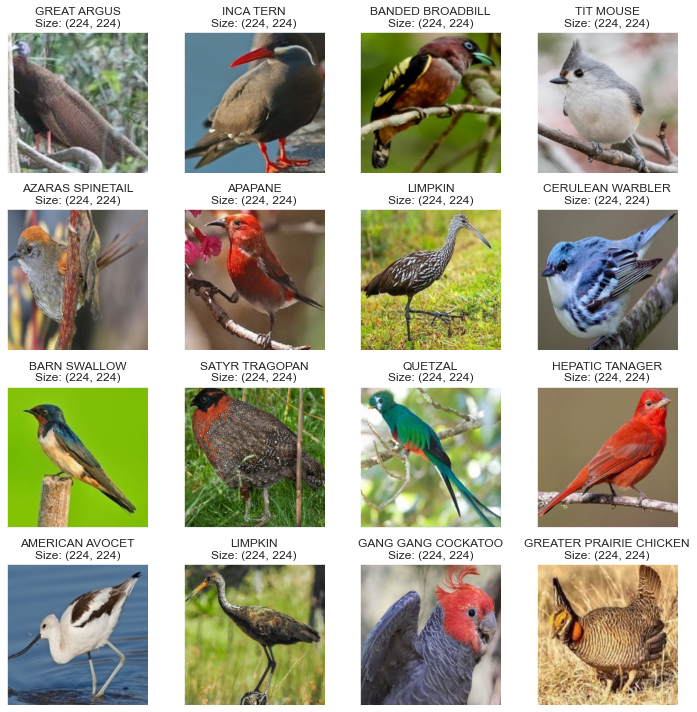

In [9]:
# Display 16 picture of the dataset with their labels
random_index = np.random.randint(0, len(image_df_train), 16)
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    # ax.imshow(plt.imread(image_df_train.Filepath[random_index[i]]))
    # ax.set_title(image_df_train.Label[random_index[i]])
    img = Image.open(image_df_train.Filepath[random_index[i]])
    ax.imshow(img)
    ax.set_title(f"{image_df_train.Label[random_index[i]]}\nSize: {img.size}")
    img.close()
plt.tight_layout()
plt.show()

In [10]:
def compute_ela_cv(path, quality):
    temp_filename = 'temp_file_name.jpeg'
    SCALE = 15
    orig_img = cv2.imread(path)
    orig_img = cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB)

    cv2.imwrite(temp_filename, orig_img, [cv2.IMWRITE_JPEG_QUALITY, quality])

    # read compressed image
    compressed_img = cv2.imread(temp_filename)

    # get absolute difference between img1 and img2 and multiply by scale
    diff = SCALE * cv2.absdiff(orig_img, compressed_img)
    return diff


def convert_to_ela_image(path, quality):
    temp_filename = 'temp_file_name.jpeg'
    ela_filename = 'temp_ela.png'
    image = Image.open(path).convert('RGB')
    image.save(temp_filename, 'JPEG', quality = quality)
    temp_image = Image.open(temp_filename)

    ela_image = ImageChops.difference(image, temp_image)

    extrema = ela_image.getextrema()
    max_diff = max([ex[1] for ex in extrema])
    if max_diff == 0:
        max_diff = 1

    scale = 255.0 / max_diff
    ela_image = ImageEnhance.Brightness(ela_image).enhance(scale)

    return ela_image


def random_sample(path, extension=None):
    if extension:
        items = Path(path).glob(f'*.{extension}')
    else:
        items = Path(path).glob(f'*')

    items = list(items)

    p = random.choice(items)
    return p.as_posix()

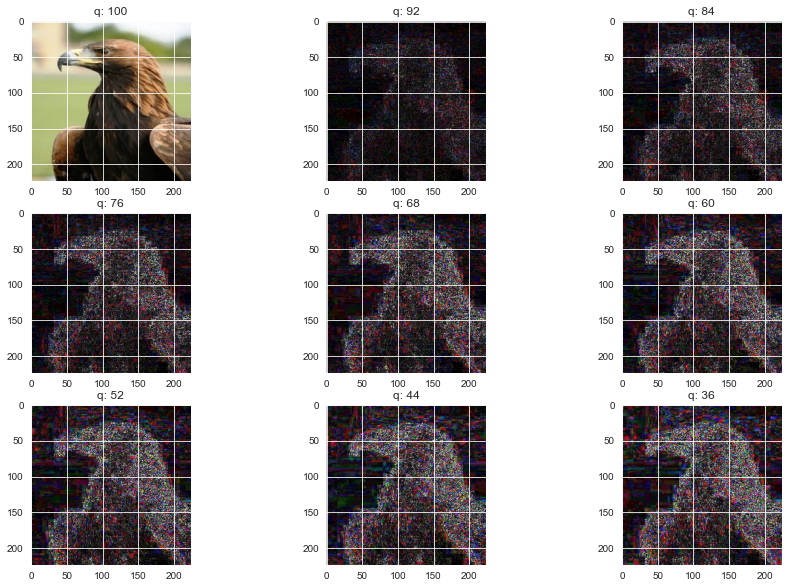

In [11]:
# View random sample from the dataset
p = random_sample(r'C:\\Users\\Aldan\\Documents\\bird_classification\\100-bird-species\\train\\GOLDEN EAGLE')
orig = cv2.imread(p)
orig = cv2.cvtColor(orig, cv2.COLOR_BGR2RGB) / 255.0
init_val = 100
columns = 3
rows = 3

fig=plt.figure(figsize=(15, 10))
for i in range(1, columns*rows +1):
    quality=init_val - (i-1) * 8
    img = compute_ela_cv(path=p, quality=quality)
    if i == 1:
        img = orig.copy()
    ax = fig.add_subplot(rows, columns, i)
    ax.title.set_text(f'q: {quality}')
    plt.imshow(img)
plt.show()

In [12]:
# How many classes have?
num_of_bird_groups = len(os.listdir(r"C:\\Users\\Aldan\\Documents\\bird_classification\\100-bird-species\\train"))
num_of_bird_groups

524

In [24]:
from torchvision import transforms
from PIL import Image
import torch
from torch.utils.data import Dataset

# Definindo constantes
NUM_CLASSES = num_of_bird_groups  # Número de classes de pássaros
INPUT_SHAPE = (224, 224, 3)

class CustomImageDataset(Dataset):
    def __init__(self, dataframe, x_col, y_col, model_name, label_mapping, transform=None):
        self.df = dataframe
        self.x_col = x_col
        self.y_col = y_col
        self.transform = transform
        self.label_mapping = label_mapping

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        img_path = self.df.iloc[idx][self.x_col]
        image = Image.open(img_path).convert('RGB')
        label = self.df.iloc[idx][self.y_col]
        label = self.label_mapping[label]  # Convertendo rótulo textual para índice numérico

        if self.transform:
            image = self.transform(image)

        # Convertendo rótulos em tensor, se necessário
        if not isinstance(label, torch.Tensor):
            label = torch.tensor(label, dtype=torch.long)

        return image, label

def create_data_loader(df, x_col, y_col, model_name, batch_size=32):
    # Definir transformações com base no modelo
    if model_name in ['VGG16', 'ResNet50', 'EfficientNetB0', 'DenseNet121']:
        # Valores padrão para modelos treinados no ImageNet
        preprocess = transforms.Compose([
            transforms.Resize(INPUT_SHAPE[:2]),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        ])
    else:
        raise ValueError("Modelo desconhecido.")

    dataset = CustomImageDataset(dataframe=df, x_col=x_col, y_col=y_col, model_name=model_name, label_mapping=label_mapping, transform=preprocess)
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

    return dataloader

In [ ]:
# Definindo constantes
# NUM_CLASSES = num_of_bird_groups  # Número de classes de pássaros
# INPUT_SHAPE = (224, 224, 3)

# # VGG16
# train_generator_vgg16 = create_data_loader(image_df_train, 'Filepath', 'Label', 'VGG16')
# val_generator_vgg16 = create_data_loader(image_df_valid, 'Filepath', 'Label', 'VGG16')

# # Resnet50
# train_generator_resnet = create_data_loader(image_df_train, 'Filepath', 'Label', 'ResNet50')
# val_generator_resnet = create_data_loader(image_df_valid, 'Filepath', 'Label', 'ResNet50')

# # EfficientNetB0
# train_generator_effnet = create_data_loader(image_df_train, 'Filepath', 'Label', 'EfficientNetB0')
# val_generator_effnet = create_data_loader(image_df_valid, 'Filepath', 'Label', 'EfficientNetB0')

# # DenseNet121
# train_generator_densenet = create_data_loader(image_df_train, 'Filepath', 'Label', 'DenseNet121')
# val_generator_densenet = create_data_loader(image_df_valid, 'Filepath', 'Label', 'DenseNet121')

In [38]:
print(torch.__version__)

1.10.0


In [50]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models
import optuna
import timm
from torch.utils.data import DataLoader

class CustomModel(nn.Module):
    def __init__(self, architecture, num_units, dropout_rate, num_classes):
        super(CustomModel, self).__init__()
        if architecture == 'VGG16':
            self.base_model = models.vgg16(pretrained=True)
            in_features = self.base_model.classifier[6].in_features
            self.base_model.classifier[6] = nn.Identity()
        elif architecture == 'ResNet50':
            self.base_model = models.resnet50(pretrained=True)
            in_features = self.base_model.fc.in_features
            self.base_model.fc = nn.Identity()
        elif architecture == 'EfficientNetB0':
            self.base_model = timm.create_model('efficientnet_b0', pretrained=True)
            in_features = self.base_model.get_classifier().in_features
            self.base_model.reset_classifier(0)
        elif architecture == 'DenseNet121':
            self.base_model = models.densenet121(pretrained=True)
            in_features = self.base_model.classifier.in_features
            self.base_model.classifier = nn.Identity()
        else:
            raise ValueError("Modelo desconhecido")

        # Descongelar as últimas camadas convolucionais
        for param in self.base_model.parameters():
            param.requires_grad = False

        if architecture == 'ResNet50':
            for param in self.base_model.layer4.parameters():
                param.requires_grad = True

        if architecture == 'DenseNet121':
            for param in self.base_model.features.norm5.parameters():
                param.requires_grad = True

        if architecture == 'EfficientNetB0':
            for name, parameter in self.base_model.named_parameters():
                if 'blocks' in name and int(name.split('.')[1]) >= 5:
                    parameter.requires_grad = True

        # self.new_layers = nn.Sequential(
        #     nn.Linear(in_features, num_units),
        #     nn.ReLU(),
        #     nn.Dropout(dropout_rate),
        #     nn.Linear(num_units, num_classes),
        #     nn.Softmax(dim=1)
        # )

        # # Descongelar as últimas camadas convolucionais
        # for param in self.base_model.parameters():
        #     param.requires_grad = False
        # for param in self.base_model.features[-1].parameters():
        #     param.requires_grad = True

        # Novas camadas
        self.new_layers = nn.Sequential(
            nn.Linear(in_features, num_units),
            nn.LeakyReLU(),
            nn.BatchNorm1d(num_units),
            nn.Dropout(dropout_rate),
            nn.Linear(num_units, num_units // 2),
            nn.LeakyReLU(),
            nn.BatchNorm1d(num_units // 2),
            nn.Linear(num_units // 2, num_classes)
        )

    def forward(self, x):
        x = self.base_model(x)
        x = self.new_layers(x)
        return x

def create_model(trial, num_classes):
    architecture = trial.suggest_categorical('architecture', ['VGG16', 'ResNet50', 'EfficientNetB0', 'DenseNet121'])
    num_units = trial.suggest_categorical('num_units', [256, 512, 1024])
    dropout_rate = trial.suggest_float('dropout_rate', 0.1, 0.5)
    learning_rate = trial.suggest_float('learning_rate', 1e-5, 1e-3, log=True)

    # Aqui você construirá o modelo com base na arquitetura escolhida
    model = CustomModel(architecture, num_units, dropout_rate, num_classes)

    # Retornar o modelo e o otimizador
    optimizer = optim.Adamax(model.parameters(), lr=learning_rate)
    return model, optimizer


In [ ]:
# Explicação das últimas camadas
'''
    nn.Linear(in_features, num_units): Esta é uma camada linear (ou totalmente conectada). Ela aplica uma transformação linear aos dados de entrada. in_features é o número de recursos de entrada (ou seja, o tamanho da última camada do modelo base), e num_units é o número de neurônios nesta camada. Esta camada cria uma combinação linear dos dados de entrada.

    nn.LeakyReLU(): Leaky ReLU é uma função de ativação que permite passar uma pequena quantidade de gradiente mesmo para unidades inativas (valores negativos). Isso ajuda a mitigar o problema do desaparecimento do gradiente em redes profundas. A diferença entre Leaky ReLU e ReLU é que, para valores negativos, Leaky ReLU permite um pequeno gradiente ao invés de zero.

    nn.BatchNorm1d(num_units): Normalização em lote. Esta camada normaliza os dados de saída da camada anterior. Ela ajuda a estabilizar e acelerar o treinamento, ajustando e escalando as ativações. num_units é o número de recursos que serão normalizados.

    nn.Dropout(dropout_rate): Dropout é uma técnica de regularização. Durante o treinamento, alguns neurônios são "desligados" aleatoriamente (com uma probabilidade dada por dropout_rate). Isso ajuda a evitar o overfitting, forçando a rede a aprender representações mais robustas que não dependem de um pequeno conjunto de neurônios.

    nn.Linear(num_units, num_units // 2): Outra camada linear. Desta vez, ela reduz o número de neurônios pela metade (indicado por num_units // 2). Isso é comum em redes neurais para formar uma estrutura de "funil", onde cada camada sucessiva tem menos neurônios.

    nn.LeakyReLU(): Novamente, uma função de ativação Leaky ReLU é aplicada.

    nn.BatchNorm1d(num_units // 2): Mais uma camada de normalização em lote, desta vez para a saída da segunda camada linear.

    nn.Linear(num_units // 2, num_classes): A última camada linear, que mapeia a saída da camada anterior para o número final de classes (num_classes). Essa é a camada de saída, onde o número de saídas corresponde ao número de classes no problema de classificação.
'''

In [51]:
# def train(model, optimizer, criterion, train_loader, device):
#     model.train()
#     total_loss = 0
#     for batch in train_loader:
#         inputs, targets = batch
#         # Garantir que inputs e targets são tensores do PyTorch
#         if not (isinstance(inputs, torch.Tensor) and isinstance(targets, torch.Tensor)):
#             raise TypeError("inputs e targets devem ser tensores do PyTorch.")

#         inputs, targets = inputs.to(device), targets.to(device)

#         optimizer.zero_grad()
#         outputs = model(inputs)
#         loss = criterion(outputs, targets)
#         loss.backward()
#         optimizer.step()

#         total_loss += loss.item()
#     return total_loss / len(train_loader)

def train(model, optimizer, criterion, train_loader, device, print_every=100):
    model.train()
    total_loss = 0
    for i, batch in enumerate(train_loader):
        inputs, targets = batch
        inputs, targets = inputs.to(device), targets.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

        if (i + 1) % print_every == 0:
            print(f"Iteração {i+1}/{len(train_loader)} - Perda: {loss.item()}")

    return total_loss / len(train_loader)

# def validate(model, criterion, val_loader, device):
#     model.eval()
#     total_loss = 0
#     with torch.no_grad():
#         for inputs, targets in val_loader:
#             inputs, targets = inputs.to(device), targets.to(device)

#             outputs = model(inputs)
#             loss = criterion(outputs, targets)
#             total_loss += loss.item()
#     return total_loss / len(val_loader)

def validate(model, criterion, val_loader, device):
    model.eval()
    total_loss = 0
    with torch.no_grad():
        for inputs, targets in val_loader:
            inputs, targets = inputs.to(device), targets.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, targets)
            total_loss += loss.item()

    avg_loss = total_loss / len(val_loader)
    print(f"Validação - Perda Média: {avg_loss}")
    return avg_loss

In [55]:
# def calculate_accuracy(model, data_loader, device):
#     model.eval()
#     correct = 0
#     total = 0
#     with torch.no_grad():
#         for inputs, labels in data_loader:
#             inputs, labels = inputs.to(device), labels.to(device)
#             outputs = model(inputs)
#             _, predicted = torch.max(outputs.data, 1)
#             total += labels.size(0)
#             correct += (predicted == labels).sum().item()
#     return correct / total

def calculate_accuracy(model, data_loader, device, print_every=100):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for i, (inputs, labels) in enumerate(data_loader):
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            if (i + 1) % print_every == 0:
                batch_accuracy = 100 * (correct / total)
                print(f"Lote {i+1}/{len(data_loader)} - Acurácia: {batch_accuracy:.2f}%")

    overall_accuracy = 100 * (correct / total)
    print(f"Acurácia Geral: {overall_accuracy:.2f}%")
    return overall_accuracy

def objective(trial):
    NUM_CLASSES = num_of_bird_groups  # Número de classes de pássaros
    NUM_EPOCHS = 1  # Defina o número de épocas apropriado
    INPUT_SHAPE = (224, 224, 3)

    # Escolher a arquitetura e os hiperparâmetros
    architecture = trial.suggest_categorical('architecture', ['VGG16', 'ResNet50', 'EfficientNetB0', 'DenseNet121'])

    # Criar o modelo com os hiperparâmetros escolhidos
    model, optimizer = create_model(trial, NUM_CLASSES)
    criterion = torch.nn.CrossEntropyLoss()
    # device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    device = torch.device("cuda")
    model = model.to(device)

    # Criar DataLoader
    train_loader = create_data_loader(image_df_train, 'Filepath', 'Label', architecture)
    val_loader = create_data_loader(image_df_valid, 'Filepath', 'Label', architecture)

    # Iniciar o treinamento e validação
    for epoch in range(NUM_EPOCHS):
        train_loss = train(model, optimizer, criterion, train_loader, device)
        val_loss = validate(model, criterion, val_loader, device)
        

    # Calcular e retornar a acurácia
    accuracy = calculate_accuracy(model, val_loader, device)
    return accuracy

In [61]:
if torch.cuda.is_available():
    print(f"GPU is available: {torch.cuda.get_device_name(0)}")
else:
    print("GPU is NOT available")

GPU is available: NVIDIA GeForce RTX 4090


In [62]:
import pickle
def save_study_callback(study, trial, filename='my_study.pkl'):
    """Função de callback para salvar o estudo."""
    with open(filename, 'wb') as f:
        pickle.dump(study, f)

In [63]:
NUM_EPOCHS = 1
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100, callbacks=[lambda study, trial: save_study_callback(study, trial, 'my_study.pkl')])


[I 2023-12-19 02:05:37,257] A new study created in memory with name: no-name-f712f56c-c348-4d9d-9315-2640dcf0054f


Iteração 100/5280 - Perda: 5.860519886016846
Iteração 200/5280 - Perda: 5.37648868560791
Iteração 300/5280 - Perda: 4.922610282897949
Iteração 400/5280 - Perda: 4.588799476623535
Iteração 500/5280 - Perda: 4.225395679473877
Iteração 600/5280 - Perda: 4.146664619445801
Iteração 700/5280 - Perda: 3.494663953781128
Iteração 800/5280 - Perda: 3.456660032272339
Iteração 900/5280 - Perda: 2.966675281524658
Iteração 1000/5280 - Perda: 2.715214729309082
Iteração 1100/5280 - Perda: 2.591428279876709
Iteração 1200/5280 - Perda: 2.4998645782470703
Iteração 1300/5280 - Perda: 2.077190637588501
Iteração 1400/5280 - Perda: 2.231520414352417
Iteração 1500/5280 - Perda: 1.6711348295211792
Iteração 1600/5280 - Perda: 1.6503698825836182
Iteração 1700/5280 - Perda: 1.386299729347229
Iteração 1800/5280 - Perda: 1.4024525880813599
Iteração 1900/5280 - Perda: 1.4462158679962158
Iteração 2000/5280 - Perda: 1.0830104351043701
Iteração 2100/5280 - Perda: 1.1908282041549683
Iteração 2200/5280 - Perda: 1.1415097

[I 2023-12-19 02:11:55,008] Trial 0 finished with value: 94.92366412213741 and parameters: {'architecture': 'EfficientNetB0', 'num_units': 1024, 'dropout_rate': 0.16034974183420514, 'learning_rate': 0.0002872735179281504}. Best is trial 0 with value: 94.92366412213741.


Acurácia Geral: 94.92%
Iteração 100/5280 - Perda: 6.5412187576293945
Iteração 200/5280 - Perda: 6.3757710456848145
Iteração 300/5280 - Perda: 6.367805004119873
Iteração 400/5280 - Perda: 6.564229488372803
Iteração 500/5280 - Perda: 6.459259986877441
Iteração 600/5280 - Perda: 6.461704730987549
Iteração 700/5280 - Perda: 6.568751811981201
Iteração 800/5280 - Perda: 6.398000717163086
Iteração 900/5280 - Perda: 6.429223537445068
Iteração 1000/5280 - Perda: 6.400412082672119
Iteração 1100/5280 - Perda: 6.259533405303955
Iteração 1200/5280 - Perda: 6.489272594451904
Iteração 1300/5280 - Perda: 6.316600799560547
Iteração 1400/5280 - Perda: 6.402442455291748
Iteração 1500/5280 - Perda: 6.360249996185303
Iteração 1600/5280 - Perda: 6.352676868438721
Iteração 1700/5280 - Perda: 6.43779993057251
Iteração 1800/5280 - Perda: 6.305023670196533
Iteração 1900/5280 - Perda: 6.248891353607178
Iteração 2000/5280 - Perda: 6.388800144195557
Iteração 2100/5280 - Perda: 6.296288967132568
Iteração 2200/5280 

[I 2023-12-19 02:18:20,207] Trial 1 finished with value: 2.0610687022900764 and parameters: {'architecture': 'VGG16', 'num_units': 256, 'dropout_rate': 0.18248815738146093, 'learning_rate': 1.0191048193305986e-05}. Best is trial 0 with value: 94.92366412213741.


Acurácia Geral: 2.06%
Iteração 100/5280 - Perda: 5.995676517486572
Iteração 200/5280 - Perda: 5.942132949829102
Iteração 300/5280 - Perda: 5.640048980712891
Iteração 400/5280 - Perda: 5.459247589111328
Iteração 500/5280 - Perda: 5.096323490142822
Iteração 600/5280 - Perda: 5.015944957733154
Iteração 700/5280 - Perda: 4.6768412590026855
Iteração 800/5280 - Perda: 4.623150825500488
Iteração 900/5280 - Perda: 4.542102336883545
Iteração 1000/5280 - Perda: 3.925631046295166
Iteração 1100/5280 - Perda: 3.8400425910949707
Iteração 1200/5280 - Perda: 3.748272657394409
Iteração 1300/5280 - Perda: 3.7514560222625732
Iteração 1400/5280 - Perda: 3.719799757003784
Iteração 1500/5280 - Perda: 3.2658157348632812
Iteração 1600/5280 - Perda: 2.9720170497894287
Iteração 1700/5280 - Perda: 3.2524585723876953
Iteração 1800/5280 - Perda: 2.989522695541382
Iteração 1900/5280 - Perda: 2.5961074829101562
Iteração 2000/5280 - Perda: 2.3901164531707764
Iteração 2100/5280 - Perda: 2.3733901977539062
Iteração 220

[I 2023-12-19 02:24:38,040] Trial 2 finished with value: 91.98473282442748 and parameters: {'architecture': 'EfficientNetB0', 'num_units': 1024, 'dropout_rate': 0.1739947556742263, 'learning_rate': 0.0001426196434330292}. Best is trial 0 with value: 94.92366412213741.


Acurácia Geral: 91.98%
Iteração 100/5280 - Perda: 6.45497465133667
Iteração 200/5280 - Perda: 6.1152825355529785
Iteração 300/5280 - Perda: 6.4222588539123535
Iteração 400/5280 - Perda: 6.43021821975708
Iteração 500/5280 - Perda: 6.326912879943848
Iteração 600/5280 - Perda: 6.186049938201904
Iteração 700/5280 - Perda: 6.142294883728027
Iteração 800/5280 - Perda: 6.30970573425293
Iteração 900/5280 - Perda: 6.315492630004883
Iteração 1000/5280 - Perda: 6.42971658706665
Iteração 1100/5280 - Perda: 6.291133880615234
Iteração 1200/5280 - Perda: 6.26984977722168
Iteração 1300/5280 - Perda: 6.182542324066162
Iteração 1400/5280 - Perda: 6.173234462738037
Iteração 1500/5280 - Perda: 6.068604946136475
Iteração 1600/5280 - Perda: 6.1025824546813965
Iteração 1700/5280 - Perda: 6.029706001281738
Iteração 1800/5280 - Perda: 6.000084400177002
Iteração 1900/5280 - Perda: 6.07632303237915
Iteração 2000/5280 - Perda: 6.075009346008301
Iteração 2100/5280 - Perda: 5.975910663604736
Iteração 2200/5280 - Pe

[I 2023-12-19 02:30:55,083] Trial 3 finished with value: 22.595419847328245 and parameters: {'architecture': 'EfficientNetB0', 'num_units': 256, 'dropout_rate': 0.399664855349661, 'learning_rate': 4.4166712846432805e-05}. Best is trial 0 with value: 94.92366412213741.


Acurácia Geral: 22.60%
Iteração 100/5280 - Perda: 6.073441505432129
Iteração 200/5280 - Perda: 5.788022994995117
Iteração 300/5280 - Perda: 5.575181484222412
Iteração 400/5280 - Perda: 5.283967971801758
Iteração 500/5280 - Perda: 5.218903064727783
Iteração 600/5280 - Perda: 4.898362159729004
Iteração 700/5280 - Perda: 4.841114521026611
Iteração 800/5280 - Perda: 4.5980610847473145
Iteração 900/5280 - Perda: 4.69175386428833
Iteração 1000/5280 - Perda: 4.246772766113281
Iteração 1100/5280 - Perda: 4.4749979972839355
Iteração 1200/5280 - Perda: 4.309291362762451
Iteração 1300/5280 - Perda: 3.896254539489746
Iteração 1400/5280 - Perda: 3.7336909770965576
Iteração 1500/5280 - Perda: 3.87434720993042
Iteração 1600/5280 - Perda: 3.4756174087524414
Iteração 1700/5280 - Perda: 3.7629966735839844
Iteração 1800/5280 - Perda: 3.3118255138397217
Iteração 1900/5280 - Perda: 3.7251076698303223
Iteração 2000/5280 - Perda: 3.0558865070343018
Iteração 2100/5280 - Perda: 2.9509990215301514
Iteração 2200

[I 2023-12-19 02:37:19,626] Trial 4 finished with value: 78.32061068702289 and parameters: {'architecture': 'VGG16', 'num_units': 512, 'dropout_rate': 0.26711638519782754, 'learning_rate': 0.00044353387293950944}. Best is trial 0 with value: 94.92366412213741.


Acurácia Geral: 78.32%
Iteração 100/5280 - Perda: 5.609639644622803
Iteração 200/5280 - Perda: 5.350846290588379
Iteração 300/5280 - Perda: 5.0438232421875
Iteração 400/5280 - Perda: 4.623072147369385
Iteração 500/5280 - Perda: 4.37418794631958
Iteração 600/5280 - Perda: 4.337935447692871
Iteração 700/5280 - Perda: 4.13874626159668
Iteração 800/5280 - Perda: 3.6261556148529053
Iteração 900/5280 - Perda: 3.7466795444488525
Iteração 1000/5280 - Perda: 3.524115562438965
Iteração 1100/5280 - Perda: 3.2651164531707764
Iteração 1200/5280 - Perda: 2.8090837001800537
Iteração 1300/5280 - Perda: 3.215118646621704
Iteração 1400/5280 - Perda: 2.9290220737457275
Iteração 1500/5280 - Perda: 2.5720670223236084
Iteração 1600/5280 - Perda: 2.3780393600463867
Iteração 1700/5280 - Perda: 2.5802276134490967
Iteração 1800/5280 - Perda: 1.8425320386886597
Iteração 1900/5280 - Perda: 1.8684041500091553
Iteração 2000/5280 - Perda: 1.9924798011779785
Iteração 2100/5280 - Perda: 2.001401901245117
Iteração 2200

[I 2023-12-19 02:43:16,768] Trial 5 finished with value: 90.53435114503817 and parameters: {'architecture': 'DenseNet121', 'num_units': 1024, 'dropout_rate': 0.21327565944644677, 'learning_rate': 0.0003140572301133333}. Best is trial 0 with value: 94.92366412213741.


Acurácia Geral: 90.53%
Iteração 100/5280 - Perda: 6.3129682540893555
Iteração 200/5280 - Perda: 6.3677496910095215
Iteração 300/5280 - Perda: 6.329468727111816
Iteração 400/5280 - Perda: 6.226522445678711
Iteração 500/5280 - Perda: 6.284400939941406
Iteração 600/5280 - Perda: 6.1095356941223145
Iteração 700/5280 - Perda: 6.306471824645996
Iteração 800/5280 - Perda: 6.195192337036133
Iteração 900/5280 - Perda: 6.120258331298828
Iteração 1000/5280 - Perda: 6.085954666137695
Iteração 1100/5280 - Perda: 6.209536075592041
Iteração 1200/5280 - Perda: 5.962582111358643
Iteração 1300/5280 - Perda: 6.021889686584473
Iteração 1400/5280 - Perda: 5.9836883544921875
Iteração 1500/5280 - Perda: 6.139245986938477
Iteração 1600/5280 - Perda: 5.8761210441589355
Iteração 1700/5280 - Perda: 5.817854404449463
Iteração 1800/5280 - Perda: 5.736590385437012
Iteração 1900/5280 - Perda: 5.83910608291626
Iteração 2000/5280 - Perda: 5.722074031829834
Iteração 2100/5280 - Perda: 5.802165985107422
Iteração 2200/52

[I 2023-12-19 02:49:13,963] Trial 6 finished with value: 32.595419847328245 and parameters: {'architecture': 'DenseNet121', 'num_units': 1024, 'dropout_rate': 0.37904691721699646, 'learning_rate': 2.698896504317579e-05}. Best is trial 0 with value: 94.92366412213741.


Acurácia Geral: 32.60%
Iteração 100/5280 - Perda: 6.387131690979004
Iteração 200/5280 - Perda: 6.392258167266846
Iteração 300/5280 - Perda: 6.342962265014648
Iteração 400/5280 - Perda: 6.284133434295654
Iteração 500/5280 - Perda: 6.103643417358398
Iteração 600/5280 - Perda: 6.312814235687256
Iteração 700/5280 - Perda: 6.288856029510498
Iteração 800/5280 - Perda: 5.934813499450684
Iteração 900/5280 - Perda: 6.047502517700195
Iteração 1000/5280 - Perda: 6.099460124969482
Iteração 1100/5280 - Perda: 5.851172924041748
Iteração 1200/5280 - Perda: 5.984962463378906
Iteração 1300/5280 - Perda: 5.978152751922607
Iteração 1400/5280 - Perda: 5.7581329345703125
Iteração 1500/5280 - Perda: 5.790076732635498
Iteração 1600/5280 - Perda: 5.589156150817871
Iteração 1700/5280 - Perda: 5.538201332092285
Iteração 1800/5280 - Perda: 5.707284450531006
Iteração 1900/5280 - Perda: 5.588474273681641
Iteração 2000/5280 - Perda: 5.581953048706055
Iteração 2100/5280 - Perda: 5.522006511688232
Iteração 2200/5280 

[I 2023-12-19 02:55:11,879] Trial 7 finished with value: 37.900763358778626 and parameters: {'architecture': 'DenseNet121', 'num_units': 1024, 'dropout_rate': 0.32191577878259015, 'learning_rate': 3.13616003894784e-05}. Best is trial 0 with value: 94.92366412213741.


Acurácia Geral: 37.90%
Iteração 100/5280 - Perda: 5.504205703735352
Iteração 200/5280 - Perda: 4.870344638824463
Iteração 300/5280 - Perda: 3.714987277984619
Iteração 400/5280 - Perda: 3.4007575511932373
Iteração 500/5280 - Perda: 3.1951067447662354
Iteração 600/5280 - Perda: 2.818161725997925
Iteração 700/5280 - Perda: 2.2240703105926514
Iteração 800/5280 - Perda: 1.7182072401046753
Iteração 900/5280 - Perda: 1.717226505279541
Iteração 1000/5280 - Perda: 1.8189700841903687
Iteração 1100/5280 - Perda: 1.565386176109314
Iteração 1200/5280 - Perda: 1.2703348398208618
Iteração 1300/5280 - Perda: 1.568660020828247
Iteração 1400/5280 - Perda: 0.7190260887145996
Iteração 1500/5280 - Perda: 0.9162351489067078
Iteração 1600/5280 - Perda: 1.0389947891235352
Iteração 1700/5280 - Perda: 1.0337399244308472
Iteração 1800/5280 - Perda: 1.0752813816070557
Iteração 1900/5280 - Perda: 0.27643561363220215
Iteração 2000/5280 - Perda: 0.4582941234111786
Iteração 2100/5280 - Perda: 0.5084073543548584
Itera

[I 2023-12-19 03:01:27,517] Trial 8 finished with value: 95.22900763358778 and parameters: {'architecture': 'EfficientNetB0', 'num_units': 1024, 'dropout_rate': 0.12019109675994058, 'learning_rate': 0.0005480243811901251}. Best is trial 8 with value: 95.22900763358778.


Acurácia Geral: 95.23%
Iteração 100/5280 - Perda: 6.214601039886475
Iteração 200/5280 - Perda: 6.232970237731934
Iteração 300/5280 - Perda: 6.036744594573975
Iteração 400/5280 - Perda: 5.743939399719238
Iteração 500/5280 - Perda: 5.664848804473877
Iteração 600/5280 - Perda: 5.5526838302612305
Iteração 700/5280 - Perda: 5.472491264343262
Iteração 800/5280 - Perda: 5.140833377838135
Iteração 900/5280 - Perda: 5.004305362701416
Iteração 1000/5280 - Perda: 5.160495281219482
Iteração 1100/5280 - Perda: 5.001326084136963
Iteração 1200/5280 - Perda: 4.732188701629639
Iteração 1300/5280 - Perda: 4.798464298248291
Iteração 1400/5280 - Perda: 4.898555278778076
Iteração 1500/5280 - Perda: 4.744266986846924
Iteração 1600/5280 - Perda: 4.55825662612915
Iteração 1700/5280 - Perda: 4.493109703063965
Iteração 1800/5280 - Perda: 4.343725204467773
Iteração 1900/5280 - Perda: 4.434998989105225
Iteração 2000/5280 - Perda: 4.14790153503418
Iteração 2100/5280 - Perda: 4.3694610595703125
Iteração 2200/5280 -

[I 2023-12-19 03:07:52,083] Trial 9 finished with value: 68.62595419847328 and parameters: {'architecture': 'VGG16', 'num_units': 1024, 'dropout_rate': 0.13496003806049395, 'learning_rate': 0.00010083677625012305}. Best is trial 8 with value: 95.22900763358778.


Acurácia Geral: 68.63%
Iteração 100/5280 - Perda: 5.687730312347412
Iteração 200/5280 - Perda: 5.55380392074585
Iteração 300/5280 - Perda: 4.755160331726074
Iteração 400/5280 - Perda: 4.3950066566467285
Iteração 500/5280 - Perda: 4.524710178375244
Iteração 600/5280 - Perda: 3.6273891925811768
Iteração 700/5280 - Perda: 3.8693783283233643
Iteração 800/5280 - Perda: 3.4373464584350586
Iteração 900/5280 - Perda: 3.1109845638275146
Iteração 1000/5280 - Perda: 2.8536691665649414
Iteração 1100/5280 - Perda: 2.825216770172119
Iteração 1200/5280 - Perda: 2.8571014404296875
Iteração 1300/5280 - Perda: 2.264346122741699
Iteração 1400/5280 - Perda: 1.9638139009475708
Iteração 1500/5280 - Perda: 1.8377043008804321
Iteração 1600/5280 - Perda: 2.1963207721710205
Iteração 1700/5280 - Perda: 1.742967963218689
Iteração 1800/5280 - Perda: 1.2396396398544312
Iteração 1900/5280 - Perda: 1.5323553085327148
Iteração 2000/5280 - Perda: 1.267716884613037
Iteração 2100/5280 - Perda: 1.2074229717254639
Iteração

[I 2023-12-19 03:13:51,978] Trial 10 finished with value: 94.19847328244275 and parameters: {'architecture': 'ResNet50', 'num_units': 512, 'dropout_rate': 0.49473413580830783, 'learning_rate': 0.0005834853472358473}. Best is trial 8 with value: 95.22900763358778.


Acurácia Geral: 94.20%
Iteração 100/5280 - Perda: 5.042639255523682
Iteração 200/5280 - Perda: 3.7014384269714355
Iteração 300/5280 - Perda: 3.094541072845459
Iteração 400/5280 - Perda: 2.5349061489105225
Iteração 500/5280 - Perda: 2.062830686569214
Iteração 600/5280 - Perda: 1.952052116394043
Iteração 700/5280 - Perda: 1.8995869159698486
Iteração 800/5280 - Perda: 1.6343724727630615
Iteração 900/5280 - Perda: 1.0079572200775146
Iteração 1000/5280 - Perda: 1.1984866857528687
Iteração 1100/5280 - Perda: 0.6461727023124695
Iteração 1200/5280 - Perda: 0.9795227646827698
Iteração 1300/5280 - Perda: 0.6995430588722229
Iteração 1400/5280 - Perda: 0.8756138682365417
Iteração 1500/5280 - Perda: 0.814970850944519
Iteração 1600/5280 - Perda: 0.4767591059207916
Iteração 1700/5280 - Perda: 0.46743425726890564
Iteração 1800/5280 - Perda: 0.20762240886688232
Iteração 1900/5280 - Perda: 0.7058097124099731
Iteração 2000/5280 - Perda: 1.018651008605957
Iteração 2100/5280 - Perda: 0.3893412947654724
Ite

[I 2023-12-19 03:20:05,114] Trial 11 finished with value: 94.92366412213741 and parameters: {'architecture': 'EfficientNetB0', 'num_units': 1024, 'dropout_rate': 0.10847293315921919, 'learning_rate': 0.0009437858997248133}. Best is trial 8 with value: 95.22900763358778.


Acurácia Geral: 94.92%
Iteração 100/5280 - Perda: 6.098151206970215
Iteração 200/5280 - Perda: 5.524198055267334
Iteração 300/5280 - Perda: 5.061504364013672
Iteração 400/5280 - Perda: 4.570978164672852
Iteração 500/5280 - Perda: 4.571954250335693
Iteração 600/5280 - Perda: 4.139483451843262
Iteração 700/5280 - Perda: 3.9540038108825684
Iteração 800/5280 - Perda: 3.597006320953369
Iteração 900/5280 - Perda: 3.347789764404297
Iteração 1000/5280 - Perda: 3.0163309574127197
Iteração 1100/5280 - Perda: 3.0428600311279297
Iteração 1200/5280 - Perda: 2.6383705139160156
Iteração 1300/5280 - Perda: 2.7149813175201416
Iteração 1400/5280 - Perda: 2.512096881866455
Iteração 1500/5280 - Perda: 2.631892681121826
Iteração 1600/5280 - Perda: 2.134798049926758
Iteração 1700/5280 - Perda: 1.9334228038787842
Iteração 1800/5280 - Perda: 2.1858713626861572
Iteração 1900/5280 - Perda: 1.6300745010375977
Iteração 2000/5280 - Perda: 1.63478684425354
Iteração 2100/5280 - Perda: 1.2486095428466797
Iteração 220

[I 2023-12-19 03:26:15,744] Trial 12 finished with value: 94.38931297709924 and parameters: {'architecture': 'EfficientNetB0', 'num_units': 1024, 'dropout_rate': 0.1005726855422675, 'learning_rate': 0.0002179496556567235}. Best is trial 8 with value: 95.22900763358778.


Acurácia Geral: 94.39%
Iteração 100/5280 - Perda: 4.866487503051758
Iteração 200/5280 - Perda: 4.3248419761657715
Iteração 300/5280 - Perda: 3.7227084636688232
Iteração 400/5280 - Perda: 3.7391786575317383
Iteração 500/5280 - Perda: 2.9807167053222656
Iteração 600/5280 - Perda: 1.9301315546035767
Iteração 700/5280 - Perda: 1.6221249103546143
Iteração 800/5280 - Perda: 1.8660222291946411
Iteração 900/5280 - Perda: 0.9838399291038513
Iteração 1000/5280 - Perda: 1.1550778150558472
Iteração 1100/5280 - Perda: 0.9505323767662048
Iteração 1200/5280 - Perda: 1.443350911140442
Iteração 1300/5280 - Perda: 0.7355837225914001
Iteração 1400/5280 - Perda: 0.7116388082504272
Iteração 1500/5280 - Perda: 0.7684400081634521
Iteração 1600/5280 - Perda: 0.491325318813324
Iteração 1700/5280 - Perda: 0.5492583513259888
Iteração 1800/5280 - Perda: 0.5869288444519043
Iteração 1900/5280 - Perda: 0.6204571723937988
Iteração 2000/5280 - Perda: 0.9520678520202637
Iteração 2100/5280 - Perda: 0.7211987376213074
It

[I 2023-12-19 03:32:25,092] Trial 13 finished with value: 95.34351145038168 and parameters: {'architecture': 'EfficientNetB0', 'num_units': 1024, 'dropout_rate': 0.23430417440959111, 'learning_rate': 0.0007585737480349181}. Best is trial 13 with value: 95.34351145038168.


Acurácia Geral: 95.34%
Iteração 100/5280 - Perda: 5.4619035720825195
Iteração 200/5280 - Perda: 5.0122504234313965
Iteração 300/5280 - Perda: 4.281703948974609
Iteração 400/5280 - Perda: 3.9844257831573486
Iteração 500/5280 - Perda: 3.7606215476989746
Iteração 600/5280 - Perda: 3.201066017150879
Iteração 700/5280 - Perda: 2.5788004398345947
Iteração 800/5280 - Perda: 2.505952835083008
Iteração 900/5280 - Perda: 2.7872798442840576
Iteração 1000/5280 - Perda: 2.228302478790283
Iteração 1100/5280 - Perda: 1.5248050689697266
Iteração 1200/5280 - Perda: 1.1988916397094727
Iteração 1300/5280 - Perda: 1.3133070468902588
Iteração 1400/5280 - Perda: 1.5918056964874268
Iteração 1500/5280 - Perda: 1.114682912826538
Iteração 1600/5280 - Perda: 0.8778005242347717
Iteração 1700/5280 - Perda: 0.6397687792778015
Iteração 1800/5280 - Perda: 0.7999674081802368
Iteração 1900/5280 - Perda: 0.6562528610229492
Iteração 2000/5280 - Perda: 0.703074038028717
Iteração 2100/5280 - Perda: 0.5777432322502136
Itera

[I 2023-12-19 03:38:23,855] Trial 14 finished with value: 94.38931297709924 and parameters: {'architecture': 'ResNet50', 'num_units': 512, 'dropout_rate': 0.24147493682817175, 'learning_rate': 0.0009473606015103851}. Best is trial 13 with value: 95.34351145038168.


Acurácia Geral: 94.39%
Iteração 100/5280 - Perda: 6.124441623687744
Iteração 200/5280 - Perda: 6.138336658477783
Iteração 300/5280 - Perda: 5.603256702423096
Iteração 400/5280 - Perda: 5.351335048675537
Iteração 500/5280 - Perda: 5.0935378074646
Iteração 600/5280 - Perda: 5.156968116760254
Iteração 700/5280 - Perda: 5.174312591552734
Iteração 800/5280 - Perda: 4.770133018493652
Iteração 900/5280 - Perda: 4.765647888183594
Iteração 1000/5280 - Perda: 4.741693019866943
Iteração 1100/5280 - Perda: 4.050126075744629
Iteração 1200/5280 - Perda: 4.317114353179932
Iteração 1300/5280 - Perda: 3.9575705528259277
Iteração 1400/5280 - Perda: 4.1656365394592285
Iteração 1500/5280 - Perda: 3.4650497436523438
Iteração 1600/5280 - Perda: 3.1910295486450195
Iteração 1700/5280 - Perda: 3.3261404037475586
Iteração 1800/5280 - Perda: 2.9350807666778564
Iteração 1900/5280 - Perda: 2.623239517211914
Iteração 2000/5280 - Perda: 2.2951464653015137
Iteração 2100/5280 - Perda: 2.402862548828125
Iteração 2200/5

[I 2023-12-19 03:44:33,782] Trial 15 finished with value: 92.25190839694658 and parameters: {'architecture': 'EfficientNetB0', 'num_units': 256, 'dropout_rate': 0.30205816803315866, 'learning_rate': 0.0005672983051587392}. Best is trial 13 with value: 95.34351145038168.


Acurácia Geral: 92.25%
Iteração 100/5280 - Perda: 6.0574727058410645
Iteração 200/5280 - Perda: 5.9658966064453125
Iteração 300/5280 - Perda: 5.648129940032959
Iteração 400/5280 - Perda: 5.14739465713501
Iteração 500/5280 - Perda: 5.0053558349609375
Iteração 600/5280 - Perda: 4.572789669036865
Iteração 700/5280 - Perda: 4.549998760223389
Iteração 800/5280 - Perda: 4.409537315368652
Iteração 900/5280 - Perda: 3.6521804332733154
Iteração 1000/5280 - Perda: 4.03726863861084
Iteração 1100/5280 - Perda: 3.285043954849243
Iteração 1200/5280 - Perda: 3.436206579208374
Iteração 1300/5280 - Perda: 3.2752177715301514
Iteração 1400/5280 - Perda: 3.335157871246338
Iteração 1500/5280 - Perda: 2.9335861206054688
Iteração 1600/5280 - Perda: 2.8902902603149414
Iteração 1700/5280 - Perda: 2.4631967544555664
Iteração 1800/5280 - Perda: 2.696988105773926
Iteração 1900/5280 - Perda: 2.1940863132476807
Iteração 2000/5280 - Perda: 2.0951778888702393
Iteração 2100/5280 - Perda: 1.9235962629318237
Iteração 22

[I 2023-12-19 03:50:43,885] Trial 16 finished with value: 93.54961832061068 and parameters: {'architecture': 'EfficientNetB0', 'num_units': 1024, 'dropout_rate': 0.21803773209312136, 'learning_rate': 0.0001885367784361452}. Best is trial 13 with value: 95.34351145038168.


Acurácia Geral: 93.55%
Iteração 100/5280 - Perda: 5.985801696777344
Iteração 200/5280 - Perda: 6.131776809692383
Iteração 300/5280 - Perda: 6.181910514831543
Iteração 400/5280 - Perda: 5.815813064575195
Iteração 500/5280 - Perda: 5.951494216918945
Iteração 600/5280 - Perda: 5.698761940002441
Iteração 700/5280 - Perda: 5.698020935058594
Iteração 800/5280 - Perda: 5.531664848327637
Iteração 900/5280 - Perda: 5.533344745635986
Iteração 1000/5280 - Perda: 5.583156585693359
Iteração 1100/5280 - Perda: 5.130740642547607
Iteração 1200/5280 - Perda: 5.154045581817627
Iteração 1300/5280 - Perda: 5.083472728729248
Iteração 1400/5280 - Perda: 5.2514777183532715
Iteração 1500/5280 - Perda: 5.108567714691162
Iteração 1600/5280 - Perda: 4.920997619628906
Iteração 1700/5280 - Perda: 5.194046974182129
Iteração 1800/5280 - Perda: 4.646947383880615
Iteração 1900/5280 - Perda: 4.516141891479492
Iteração 2000/5280 - Perda: 3.926708936691284
Iteração 2100/5280 - Perda: 4.19549560546875
Iteração 2200/5280 -

[I 2023-12-19 03:56:53,177] Trial 17 finished with value: 80.57251908396947 and parameters: {'architecture': 'EfficientNetB0', 'num_units': 1024, 'dropout_rate': 0.2691633544741095, 'learning_rate': 6.595586768787389e-05}. Best is trial 13 with value: 95.34351145038168.


Acurácia Geral: 80.57%
Iteração 100/5280 - Perda: 5.546023368835449
Iteração 200/5280 - Perda: 5.042506217956543
Iteração 300/5280 - Perda: 4.825048923492432
Iteração 400/5280 - Perda: 4.559486389160156
Iteração 500/5280 - Perda: 4.811537742614746
Iteração 600/5280 - Perda: 3.659400463104248
Iteração 700/5280 - Perda: 3.6225085258483887
Iteração 800/5280 - Perda: 3.595557689666748
Iteração 900/5280 - Perda: 3.3975090980529785
Iteração 1000/5280 - Perda: 2.8195385932922363
Iteração 1100/5280 - Perda: 2.521280527114868
Iteração 1200/5280 - Perda: 2.4673821926116943
Iteração 1300/5280 - Perda: 1.940561294555664
Iteração 1400/5280 - Perda: 2.1185011863708496
Iteração 1500/5280 - Perda: 2.074875593185425
Iteração 1600/5280 - Perda: 1.4078001976013184
Iteração 1700/5280 - Perda: 1.8824632167816162
Iteração 1800/5280 - Perda: 1.3264349699020386
Iteração 1900/5280 - Perda: 1.7264071702957153
Iteração 2000/5280 - Perda: 1.8654173612594604
Iteração 2100/5280 - Perda: 0.9701634645462036
Iteração 

[I 2023-12-19 04:02:42,382] Trial 18 finished with value: 94.58015267175573 and parameters: {'architecture': 'ResNet50', 'num_units': 512, 'dropout_rate': 0.3402544367596847, 'learning_rate': 0.00041418438132743816}. Best is trial 13 with value: 95.34351145038168.


Acurácia Geral: 94.58%
Iteração 100/5280 - Perda: 6.044524192810059
Iteração 200/5280 - Perda: 5.992267608642578
Iteração 300/5280 - Perda: 5.506424427032471
Iteração 400/5280 - Perda: 5.347295761108398
Iteração 500/5280 - Perda: 5.2160749435424805
Iteração 600/5280 - Perda: 4.85376501083374
Iteração 700/5280 - Perda: 4.472995758056641
Iteração 800/5280 - Perda: 4.324853420257568
Iteração 900/5280 - Perda: 4.669257164001465
Iteração 1000/5280 - Perda: 4.433322429656982
Iteração 1100/5280 - Perda: 4.053142547607422
Iteração 1200/5280 - Perda: 3.932628870010376
Iteração 1300/5280 - Perda: 3.814331293106079
Iteração 1400/5280 - Perda: 3.1543190479278564
Iteração 1500/5280 - Perda: 3.1130731105804443
Iteração 1600/5280 - Perda: 2.2040305137634277
Iteração 1700/5280 - Perda: 2.8187808990478516
Iteração 1800/5280 - Perda: 2.620220422744751
Iteração 1900/5280 - Perda: 2.395190477371216
Iteração 2000/5280 - Perda: 2.036815881729126
Iteração 2100/5280 - Perda: 1.9015393257141113
Iteração 2200/5

[I 2023-12-19 04:08:50,532] Trial 19 finished with value: 92.44274809160305 and parameters: {'architecture': 'EfficientNetB0', 'num_units': 256, 'dropout_rate': 0.48773160943855914, 'learning_rate': 0.0009118723320771746}. Best is trial 13 with value: 95.34351145038168.


Acurácia Geral: 92.44%
Iteração 100/5280 - Perda: 6.257912635803223
Iteração 200/5280 - Perda: 5.834895133972168
Iteração 300/5280 - Perda: 5.529390335083008
Iteração 400/5280 - Perda: 5.044843673706055
Iteração 500/5280 - Perda: 5.091035842895508
Iteração 600/5280 - Perda: 4.989792346954346
Iteração 700/5280 - Perda: 4.821464538574219
Iteração 800/5280 - Perda: 4.6908674240112305
Iteração 900/5280 - Perda: 4.641214370727539
Iteração 1000/5280 - Perda: 4.123227596282959
Iteração 1100/5280 - Perda: 4.050180912017822
Iteração 1200/5280 - Perda: 3.8066205978393555
Iteração 1300/5280 - Perda: 3.4328649044036865
Iteração 1400/5280 - Perda: 3.4089181423187256
Iteração 1500/5280 - Perda: 3.3659088611602783
Iteração 1600/5280 - Perda: 3.1461024284362793
Iteração 1700/5280 - Perda: 3.3667709827423096
Iteração 1800/5280 - Perda: 2.9643876552581787
Iteração 1900/5280 - Perda: 2.9381871223449707
Iteração 2000/5280 - Perda: 2.8402724266052246
Iteração 2100/5280 - Perda: 2.5152838230133057
Iteração 

[I 2023-12-19 04:15:00,231] Trial 20 finished with value: 92.97709923664122 and parameters: {'architecture': 'EfficientNetB0', 'num_units': 1024, 'dropout_rate': 0.14117625662632327, 'learning_rate': 0.0001333016080573172}. Best is trial 13 with value: 95.34351145038168.


Acurácia Geral: 92.98%
Iteração 100/5280 - Perda: 5.888121604919434
Iteração 200/5280 - Perda: 5.322022438049316
Iteração 300/5280 - Perda: 4.966872692108154
Iteração 400/5280 - Perda: 4.433228015899658
Iteração 500/5280 - Perda: 4.397414207458496
Iteração 600/5280 - Perda: 3.9828577041625977
Iteração 700/5280 - Perda: 3.368894338607788
Iteração 800/5280 - Perda: 3.4563944339752197
Iteração 900/5280 - Perda: 3.326899766921997
Iteração 1000/5280 - Perda: 2.7273755073547363
Iteração 1100/5280 - Perda: 2.290468215942383
Iteração 1200/5280 - Perda: 2.544144868850708
Iteração 1300/5280 - Perda: 1.712221384048462
Iteração 1400/5280 - Perda: 1.828993558883667
Iteração 1500/5280 - Perda: 1.9935959577560425
Iteração 1600/5280 - Perda: 1.6490428447723389
Iteração 1700/5280 - Perda: 1.5460513830184937
Iteração 1800/5280 - Perda: 1.6823972463607788
Iteração 1900/5280 - Perda: 1.6946208477020264
Iteração 2000/5280 - Perda: 1.3964447975158691
Iteração 2100/5280 - Perda: 1.3353413343429565
Iteração 2

[I 2023-12-19 04:21:11,693] Trial 21 finished with value: 93.93129770992367 and parameters: {'architecture': 'EfficientNetB0', 'num_units': 1024, 'dropout_rate': 0.1708556487612377, 'learning_rate': 0.00028195845909994823}. Best is trial 13 with value: 95.34351145038168.


Acurácia Geral: 93.93%
Iteração 100/5280 - Perda: 5.023308277130127
Iteração 200/5280 - Perda: 4.36298131942749
Iteração 300/5280 - Perda: 3.6882641315460205
Iteração 400/5280 - Perda: 3.076207160949707
Iteração 500/5280 - Perda: 2.6165878772735596
Iteração 600/5280 - Perda: 2.7150094509124756
Iteração 700/5280 - Perda: 2.4908735752105713
Iteração 800/5280 - Perda: 1.5356130599975586
Iteração 900/5280 - Perda: 1.788510799407959
Iteração 1000/5280 - Perda: 1.5359947681427002
Iteração 1100/5280 - Perda: 1.0823081731796265
Iteração 1200/5280 - Perda: 1.1305646896362305
Iteração 1300/5280 - Perda: 1.1106247901916504
Iteração 1400/5280 - Perda: 0.9000904560089111
Iteração 1500/5280 - Perda: 0.715944766998291
Iteração 1600/5280 - Perda: 0.9646633863449097
Iteração 1700/5280 - Perda: 1.0951787233352661
Iteração 1800/5280 - Perda: 0.5800854563713074
Iteração 1900/5280 - Perda: 0.691762387752533
Iteração 2000/5280 - Perda: 0.4506838023662567
Iteração 2100/5280 - Perda: 0.4311832785606384
Iteraç

[I 2023-12-19 04:27:17,187] Trial 22 finished with value: 95.26717557251908 and parameters: {'architecture': 'EfficientNetB0', 'num_units': 1024, 'dropout_rate': 0.151219774812015, 'learning_rate': 0.0006439216356854436}. Best is trial 13 with value: 95.34351145038168.


Acurácia Geral: 95.27%
Iteração 100/5280 - Perda: 5.165937423706055
Iteração 200/5280 - Perda: 4.399784564971924
Iteração 300/5280 - Perda: 4.154276371002197
Iteração 400/5280 - Perda: 3.1868996620178223
Iteração 500/5280 - Perda: 2.6395397186279297
Iteração 600/5280 - Perda: 2.6969106197357178
Iteração 700/5280 - Perda: 2.38581919670105
Iteração 800/5280 - Perda: 1.9822025299072266
Iteração 900/5280 - Perda: 1.629368543624878
Iteração 1000/5280 - Perda: 1.324974775314331
Iteração 1100/5280 - Perda: 1.8359520435333252
Iteração 1200/5280 - Perda: 1.285152792930603
Iteração 1300/5280 - Perda: 0.9460859894752502
Iteração 1400/5280 - Perda: 0.8312150835990906
Iteração 1500/5280 - Perda: 1.3619611263275146
Iteração 1600/5280 - Perda: 0.42356792092323303
Iteração 1700/5280 - Perda: 0.7380174994468689
Iteração 1800/5280 - Perda: 0.4879094660282135
Iteração 1900/5280 - Perda: 0.6330747604370117
Iteração 2000/5280 - Perda: 0.39515894651412964
Iteração 2100/5280 - Perda: 0.5991753339767456
Itera

[I 2023-12-19 04:33:22,273] Trial 23 finished with value: 95.45801526717558 and parameters: {'architecture': 'EfficientNetB0', 'num_units': 1024, 'dropout_rate': 0.20994949383268785, 'learning_rate': 0.0006275204087110099}. Best is trial 23 with value: 95.45801526717558.


Acurácia Geral: 95.46%
Iteração 100/5280 - Perda: 5.152895450592041
Iteração 200/5280 - Perda: 4.510468482971191
Iteração 300/5280 - Perda: 3.669337034225464
Iteração 400/5280 - Perda: 3.086630344390869
Iteração 500/5280 - Perda: 2.980264186859131
Iteração 600/5280 - Perda: 2.3330814838409424
Iteração 700/5280 - Perda: 2.1462085247039795
Iteração 800/5280 - Perda: 1.543742060661316
Iteração 900/5280 - Perda: 1.7226637601852417
Iteração 1000/5280 - Perda: 1.4080640077590942
Iteração 1100/5280 - Perda: 1.582175374031067
Iteração 1200/5280 - Perda: 0.6484613418579102
Iteração 1300/5280 - Perda: 0.8917155861854553
Iteração 1400/5280 - Perda: 0.801505982875824
Iteração 1500/5280 - Perda: 0.7866910099983215
Iteração 1600/5280 - Perda: 0.786316990852356
Iteração 1700/5280 - Perda: 0.6900617480278015
Iteração 1800/5280 - Perda: 0.3811822831630707
Iteração 1900/5280 - Perda: 0.5990292429924011
Iteração 2000/5280 - Perda: 0.6067745089530945
Iteração 2100/5280 - Perda: 0.31432393193244934
Iteraçã

[I 2023-12-19 04:39:26,179] Trial 24 finished with value: 95.68702290076337 and parameters: {'architecture': 'EfficientNetB0', 'num_units': 1024, 'dropout_rate': 0.2095749949722906, 'learning_rate': 0.0006575280599487696}. Best is trial 24 with value: 95.68702290076337.


Acurácia Geral: 95.69%
Iteração 100/5280 - Perda: 5.743889331817627
Iteração 200/5280 - Perda: 5.431629180908203
Iteração 300/5280 - Perda: 4.320186138153076
Iteração 400/5280 - Perda: 3.7800254821777344
Iteração 500/5280 - Perda: 4.059854984283447
Iteração 600/5280 - Perda: 3.4015541076660156
Iteração 700/5280 - Perda: 3.5002834796905518
Iteração 800/5280 - Perda: 3.121223211288452
Iteração 900/5280 - Perda: 2.5071229934692383
Iteração 1000/5280 - Perda: 2.530656337738037
Iteração 1100/5280 - Perda: 2.1905126571655273
Iteração 1200/5280 - Perda: 1.9336092472076416
Iteração 1300/5280 - Perda: 1.743615746498108
Iteração 1400/5280 - Perda: 1.5381138324737549
Iteração 1500/5280 - Perda: 1.1513644456863403
Iteração 1600/5280 - Perda: 0.8965725302696228
Iteração 1700/5280 - Perda: 0.9961112141609192
Iteração 1800/5280 - Perda: 1.838950753211975
Iteração 1900/5280 - Perda: 0.9204344153404236
Iteração 2000/5280 - Perda: 0.8177552819252014
Iteração 2100/5280 - Perda: 0.9027594327926636
Iteraçã

[I 2023-12-19 04:45:34,539] Trial 25 finished with value: 95.38167938931298 and parameters: {'architecture': 'EfficientNetB0', 'num_units': 1024, 'dropout_rate': 0.2129111962763277, 'learning_rate': 0.0003850890852501999}. Best is trial 24 with value: 95.68702290076337.


Acurácia Geral: 95.38%
Iteração 100/5280 - Perda: 5.796683311462402
Iteração 200/5280 - Perda: 5.382650375366211
Iteração 300/5280 - Perda: 4.995460510253906
Iteração 400/5280 - Perda: 4.768824577331543
Iteração 500/5280 - Perda: 4.336462497711182
Iteração 600/5280 - Perda: 4.360132694244385
Iteração 700/5280 - Perda: 3.8325185775756836
Iteração 800/5280 - Perda: 4.155921936035156
Iteração 900/5280 - Perda: 3.569847345352173
Iteração 1000/5280 - Perda: 3.107877254486084
Iteração 1100/5280 - Perda: 3.46232008934021
Iteração 1200/5280 - Perda: 3.0175468921661377
Iteração 1300/5280 - Perda: 2.9737460613250732
Iteração 1400/5280 - Perda: 2.4605085849761963
Iteração 1500/5280 - Perda: 2.450316905975342
Iteração 1600/5280 - Perda: 2.6012091636657715
Iteração 1700/5280 - Perda: 2.3286521434783936
Iteração 1800/5280 - Perda: 2.7536098957061768
Iteração 1900/5280 - Perda: 2.20330810546875
Iteração 2000/5280 - Perda: 2.078226089477539
Iteração 2100/5280 - Perda: 2.7223124504089355
Iteração 2200/

[I 2023-12-19 04:51:56,811] Trial 26 finished with value: 82.32824427480917 and parameters: {'architecture': 'VGG16', 'num_units': 1024, 'dropout_rate': 0.20399466854320164, 'learning_rate': 0.00042256419734272165}. Best is trial 24 with value: 95.68702290076337.


Acurácia Geral: 82.33%
Iteração 100/5280 - Perda: 5.823943138122559
Iteração 200/5280 - Perda: 5.347663402557373
Iteração 300/5280 - Perda: 5.108053684234619
Iteração 400/5280 - Perda: 5.087087631225586
Iteração 500/5280 - Perda: 4.649301052093506
Iteração 600/5280 - Perda: 3.938627004623413
Iteração 700/5280 - Perda: 4.447323322296143
Iteração 800/5280 - Perda: 3.8871898651123047
Iteração 900/5280 - Perda: 3.500056266784668
Iteração 1000/5280 - Perda: 3.9462366104125977
Iteração 1100/5280 - Perda: 3.4516794681549072
Iteração 1200/5280 - Perda: 3.592116594314575
Iteração 1300/5280 - Perda: 3.3428120613098145
Iteração 1400/5280 - Perda: 2.9244868755340576
Iteração 1500/5280 - Perda: 2.847877025604248
Iteração 1600/5280 - Perda: 2.710197687149048
Iteração 1700/5280 - Perda: 2.449676275253296
Iteração 1800/5280 - Perda: 2.199295997619629
Iteração 1900/5280 - Perda: 2.3294107913970947
Iteração 2000/5280 - Perda: 2.33709716796875
Iteração 2100/5280 - Perda: 2.0341455936431885
Iteração 2200/

[I 2023-12-19 04:57:49,233] Trial 27 finished with value: 95.19083969465649 and parameters: {'architecture': 'ResNet50', 'num_units': 512, 'dropout_rate': 0.257568540106975, 'learning_rate': 0.000198635537540898}. Best is trial 24 with value: 95.68702290076337.


Acurácia Geral: 95.19%
Iteração 100/5280 - Perda: 6.159008026123047
Iteração 200/5280 - Perda: 6.039520740509033
Iteração 300/5280 - Perda: 5.881154537200928
Iteração 400/5280 - Perda: 5.587900161743164
Iteração 500/5280 - Perda: 5.5868940353393555
Iteração 600/5280 - Perda: 5.589765548706055
Iteração 700/5280 - Perda: 5.298202037811279
Iteração 800/5280 - Perda: 5.478943347930908
Iteração 900/5280 - Perda: 5.0357666015625
Iteração 1000/5280 - Perda: 4.795725345611572
Iteração 1100/5280 - Perda: 5.22559928894043
Iteração 1200/5280 - Perda: 4.9586052894592285
Iteração 1300/5280 - Perda: 4.519961833953857
Iteração 1400/5280 - Perda: 5.1933722496032715
Iteração 1500/5280 - Perda: 4.646222114562988
Iteração 1600/5280 - Perda: 4.738273620605469
Iteração 1700/5280 - Perda: 4.285903453826904
Iteração 1800/5280 - Perda: 4.482313632965088
Iteração 1900/5280 - Perda: 4.133908748626709
Iteração 2000/5280 - Perda: 4.246943473815918
Iteração 2100/5280 - Perda: 4.2921929359436035
Iteração 2200/5280 

[I 2023-12-19 05:03:42,614] Trial 28 finished with value: 77.02290076335878 and parameters: {'architecture': 'DenseNet121', 'num_units': 256, 'dropout_rate': 0.1932098405591287, 'learning_rate': 0.0004208092385015444}. Best is trial 24 with value: 95.68702290076337.


Acurácia Geral: 77.02%
Iteração 100/5280 - Perda: 5.887307167053223
Iteração 200/5280 - Perda: 5.611273288726807
Iteração 300/5280 - Perda: 4.917393684387207
Iteração 400/5280 - Perda: 4.440423965454102
Iteração 500/5280 - Perda: 4.202569007873535
Iteração 600/5280 - Perda: 4.0085344314575195
Iteração 700/5280 - Perda: 3.5615196228027344
Iteração 800/5280 - Perda: 3.2916109561920166
Iteração 900/5280 - Perda: 3.063237428665161
Iteração 1000/5280 - Perda: 3.145198345184326
Iteração 1100/5280 - Perda: 2.9884300231933594
Iteração 1200/5280 - Perda: 2.761810779571533
Iteração 1300/5280 - Perda: 2.3076889514923096
Iteração 1400/5280 - Perda: 1.8439269065856934
Iteração 1500/5280 - Perda: 1.6988399028778076
Iteração 1600/5280 - Perda: 1.7423532009124756
Iteração 1700/5280 - Perda: 1.9048267602920532
Iteração 1800/5280 - Perda: 2.176830530166626
Iteração 1900/5280 - Perda: 1.3540009260177612
Iteração 2000/5280 - Perda: 1.1906582117080688
Iteração 2100/5280 - Perda: 1.1380690336227417
Iteração

[I 2023-12-19 05:09:57,011] Trial 29 finished with value: 94.31297709923663 and parameters: {'architecture': 'EfficientNetB0', 'num_units': 1024, 'dropout_rate': 0.27197842354556495, 'learning_rate': 0.0002917615552069079}. Best is trial 24 with value: 95.68702290076337.


Acurácia Geral: 94.31%
Iteração 100/5280 - Perda: 5.597893238067627
Iteração 200/5280 - Perda: 5.184613227844238
Iteração 300/5280 - Perda: 5.072805404663086
Iteração 400/5280 - Perda: 4.493530750274658
Iteração 500/5280 - Perda: 4.226954936981201
Iteração 600/5280 - Perda: 4.0444536209106445
Iteração 700/5280 - Perda: 3.2894911766052246
Iteração 800/5280 - Perda: 3.120270252227783
Iteração 900/5280 - Perda: 3.3658246994018555
Iteração 1000/5280 - Perda: 2.9586775302886963
Iteração 1100/5280 - Perda: 2.5931146144866943
Iteração 1200/5280 - Perda: 2.090620279312134
Iteração 1300/5280 - Perda: 2.2831549644470215
Iteração 1400/5280 - Perda: 1.8055881261825562
Iteração 1500/5280 - Perda: 1.8018109798431396
Iteração 1600/5280 - Perda: 1.6720035076141357
Iteração 1700/5280 - Perda: 1.8712868690490723
Iteração 1800/5280 - Perda: 1.3741035461425781
Iteração 1900/5280 - Perda: 1.3126980066299438
Iteração 2000/5280 - Perda: 1.1984591484069824
Iteração 2100/5280 - Perda: 0.9829674363136292
Iteraç

[I 2023-12-19 05:16:10,157] Trial 30 finished with value: 94.77099236641222 and parameters: {'architecture': 'EfficientNetB0', 'num_units': 1024, 'dropout_rate': 0.23123283053653312, 'learning_rate': 0.00031886010441992065}. Best is trial 24 with value: 95.68702290076337.


Acurácia Geral: 94.77%
Iteração 100/5280 - Perda: 5.245469093322754
Iteração 200/5280 - Perda: 4.193769454956055
Iteração 300/5280 - Perda: 4.496208190917969
Iteração 400/5280 - Perda: 3.1001274585723877
Iteração 500/5280 - Perda: 3.2545993328094482
Iteração 600/5280 - Perda: 2.077364444732666
Iteração 700/5280 - Perda: 1.828832745552063
Iteração 800/5280 - Perda: 1.717940330505371
Iteração 900/5280 - Perda: 1.6358245611190796
Iteração 1000/5280 - Perda: 1.1955887079238892
Iteração 1100/5280 - Perda: 0.9781610369682312
Iteração 1200/5280 - Perda: 0.6266103386878967
Iteração 1300/5280 - Perda: 0.7838847041130066
Iteração 1400/5280 - Perda: 0.757145881652832
Iteração 1500/5280 - Perda: 0.7476152777671814
Iteração 1600/5280 - Perda: 0.5808532238006592
Iteração 1700/5280 - Perda: 0.7664250135421753
Iteração 1800/5280 - Perda: 1.0257117748260498
Iteração 1900/5280 - Perda: 0.6215377449989319
Iteração 2000/5280 - Perda: 0.2768074870109558
Iteração 2100/5280 - Perda: 0.3088389039039612
Iteraç

[I 2023-12-19 05:22:20,210] Trial 31 finished with value: 95.19083969465649 and parameters: {'architecture': 'EfficientNetB0', 'num_units': 1024, 'dropout_rate': 0.2377478450830128, 'learning_rate': 0.0007180264684992252}. Best is trial 24 with value: 95.68702290076337.


Acurácia Geral: 95.19%
Iteração 100/5280 - Perda: 4.888279914855957
Iteração 200/5280 - Perda: 4.535452365875244
Iteração 300/5280 - Perda: 3.8506367206573486
Iteração 400/5280 - Perda: 3.137259006500244
Iteração 500/5280 - Perda: 2.624828338623047
Iteração 600/5280 - Perda: 2.6211493015289307
Iteração 700/5280 - Perda: 2.138209581375122
Iteração 800/5280 - Perda: 1.8895505666732788
Iteração 900/5280 - Perda: 1.661555528640747
Iteração 1000/5280 - Perda: 1.0828990936279297
Iteração 1100/5280 - Perda: 1.4302476644515991
Iteração 1200/5280 - Perda: 0.9871607422828674
Iteração 1300/5280 - Perda: 0.778873085975647
Iteração 1400/5280 - Perda: 0.6918789744377136
Iteração 1500/5280 - Perda: 0.9143932461738586
Iteração 1600/5280 - Perda: 0.6556161046028137
Iteração 1700/5280 - Perda: 0.7887237668037415
Iteração 1800/5280 - Perda: 0.7328712940216064
Iteração 1900/5280 - Perda: 0.6190288066864014
Iteração 2000/5280 - Perda: 0.6792900562286377
Iteração 2100/5280 - Perda: 0.30644312500953674
Itera

[I 2023-12-19 05:28:26,556] Trial 32 finished with value: 94.8473282442748 and parameters: {'architecture': 'EfficientNetB0', 'num_units': 1024, 'dropout_rate': 0.17975353714776618, 'learning_rate': 0.0007560961374640103}. Best is trial 24 with value: 95.68702290076337.


Acurácia Geral: 94.85%
Iteração 100/5280 - Perda: 6.51214599609375
Iteração 200/5280 - Perda: 6.279668807983398
Iteração 300/5280 - Perda: 6.392624378204346
Iteração 400/5280 - Perda: 6.238410472869873
Iteração 500/5280 - Perda: 6.092715740203857
Iteração 600/5280 - Perda: 6.245530128479004
Iteração 700/5280 - Perda: 6.23900032043457
Iteração 800/5280 - Perda: 6.124046802520752
Iteração 900/5280 - Perda: 6.001888275146484
Iteração 1000/5280 - Perda: 6.126073837280273
Iteração 1100/5280 - Perda: 6.1034040451049805
Iteração 1200/5280 - Perda: 6.233603477478027
Iteração 1300/5280 - Perda: 6.204815864562988
Iteração 1400/5280 - Perda: 6.105536937713623
Iteração 1500/5280 - Perda: 5.966526508331299
Iteração 1600/5280 - Perda: 6.130078315734863
Iteração 1700/5280 - Perda: 6.019226551055908
Iteração 1800/5280 - Perda: 6.191117763519287
Iteração 1900/5280 - Perda: 5.82612419128418
Iteração 2000/5280 - Perda: 5.825888156890869
Iteração 2100/5280 - Perda: 5.845655918121338
Iteração 2200/5280 - P

[I 2023-12-19 05:34:31,416] Trial 33 finished with value: 28.396946564885496 and parameters: {'architecture': 'EfficientNetB0', 'num_units': 1024, 'dropout_rate': 0.295087832670278, 'learning_rate': 1.57102736147948e-05}. Best is trial 24 with value: 95.68702290076337.


Acurácia Geral: 28.40%
Iteração 100/5280 - Perda: 5.185172080993652
Iteração 200/5280 - Perda: 4.213764667510986
Iteração 300/5280 - Perda: 3.922572135925293
Iteração 400/5280 - Perda: 3.610419988632202
Iteração 500/5280 - Perda: 2.2889208793640137
Iteração 600/5280 - Perda: 2.447793960571289
Iteração 700/5280 - Perda: 1.4203664064407349
Iteração 800/5280 - Perda: 1.7984724044799805
Iteração 900/5280 - Perda: 1.28689706325531
Iteração 1000/5280 - Perda: 1.2237027883529663
Iteração 1100/5280 - Perda: 1.0803717374801636
Iteração 1200/5280 - Perda: 0.9891204237937927
Iteração 1300/5280 - Perda: 1.0167466402053833
Iteração 1400/5280 - Perda: 0.9120326042175293
Iteração 1500/5280 - Perda: 0.6438698172569275
Iteração 1600/5280 - Perda: 0.691550612449646
Iteração 1700/5280 - Perda: 0.4262344539165497
Iteração 1800/5280 - Perda: 0.6072375178337097
Iteração 1900/5280 - Perda: 0.7716249227523804
Iteração 2000/5280 - Perda: 0.823692798614502
Iteração 2100/5280 - Perda: 0.39644595980644226
Iteraçã

[I 2023-12-19 05:40:39,571] Trial 34 finished with value: 95.61068702290076 and parameters: {'architecture': 'EfficientNetB0', 'num_units': 1024, 'dropout_rate': 0.19027266689198435, 'learning_rate': 0.0007250216260072379}. Best is trial 24 with value: 95.68702290076337.


Acurácia Geral: 95.61%
Iteração 100/5280 - Perda: 5.904937744140625
Iteração 200/5280 - Perda: 5.929524898529053
Iteração 300/5280 - Perda: 5.686101913452148
Iteração 400/5280 - Perda: 5.770808219909668
Iteração 500/5280 - Perda: 5.386801242828369
Iteração 600/5280 - Perda: 5.4356842041015625
Iteração 700/5280 - Perda: 5.244902610778809
Iteração 800/5280 - Perda: 5.375152111053467
Iteração 900/5280 - Perda: 5.2543439865112305
Iteração 1000/5280 - Perda: 4.777797698974609
Iteração 1100/5280 - Perda: 5.0068888664245605
Iteração 1200/5280 - Perda: 4.844465255737305
Iteração 1300/5280 - Perda: 4.9175028800964355
Iteração 1400/5280 - Perda: 4.291543960571289
Iteração 1500/5280 - Perda: 4.590274333953857
Iteração 1600/5280 - Perda: 4.196441173553467
Iteração 1700/5280 - Perda: 4.236813068389893
Iteração 1800/5280 - Perda: 4.001995086669922
Iteração 1900/5280 - Perda: 3.7978835105895996
Iteração 2000/5280 - Perda: 3.966657876968384
Iteração 2100/5280 - Perda: 3.9983608722686768
Iteração 2200/

[I 2023-12-19 05:46:59,490] Trial 35 finished with value: 72.13740458015268 and parameters: {'architecture': 'VGG16', 'num_units': 256, 'dropout_rate': 0.19514488338544841, 'learning_rate': 0.0005077656704573799}. Best is trial 24 with value: 95.68702290076337.


Acurácia Geral: 72.14%
Iteração 100/5280 - Perda: 6.117674350738525
Iteração 200/5280 - Perda: 5.361359119415283
Iteração 300/5280 - Perda: 5.245211124420166
Iteração 400/5280 - Perda: 4.959928512573242
Iteração 500/5280 - Perda: 4.520810127258301
Iteração 600/5280 - Perda: 4.230795383453369
Iteração 700/5280 - Perda: 4.049980640411377
Iteração 800/5280 - Perda: 3.3425076007843018
Iteração 900/5280 - Perda: 3.073781728744507
Iteração 1000/5280 - Perda: 3.320974349975586
Iteração 1100/5280 - Perda: 3.053349256515503
Iteração 1200/5280 - Perda: 2.6884753704071045
Iteração 1300/5280 - Perda: 2.6271045207977295
Iteração 1400/5280 - Perda: 2.7116308212280273
Iteração 1500/5280 - Perda: 1.8214930295944214
Iteração 1600/5280 - Perda: 2.226029396057129
Iteração 1700/5280 - Perda: 2.0032927989959717
Iteração 1800/5280 - Perda: 1.7231805324554443
Iteração 1900/5280 - Perda: 1.6984457969665527
Iteração 2000/5280 - Perda: 1.6987210512161255
Iteração 2100/5280 - Perda: 1.3514320850372314
Iteração 2

[I 2023-12-19 05:53:11,833] Trial 36 finished with value: 94.00763358778626 and parameters: {'architecture': 'EfficientNetB0', 'num_units': 1024, 'dropout_rate': 0.16593575694031176, 'learning_rate': 0.00023572539144014408}. Best is trial 24 with value: 95.68702290076337.


Acurácia Geral: 94.01%
Iteração 100/5280 - Perda: 5.285158157348633
Iteração 200/5280 - Perda: 5.363122940063477
Iteração 300/5280 - Perda: 4.570981025695801
Iteração 400/5280 - Perda: 4.271629810333252
Iteração 500/5280 - Perda: 4.067065238952637
Iteração 600/5280 - Perda: 3.294203996658325
Iteração 700/5280 - Perda: 3.1791553497314453
Iteração 800/5280 - Perda: 3.2204270362854004
Iteração 900/5280 - Perda: 2.464582681655884
Iteração 1000/5280 - Perda: 1.9993600845336914
Iteração 1100/5280 - Perda: 2.262716054916382
Iteração 1200/5280 - Perda: 2.0294108390808105
Iteração 1300/5280 - Perda: 1.7299989461898804
Iteração 1400/5280 - Perda: 1.5773977041244507
Iteração 1500/5280 - Perda: 1.6049344539642334
Iteração 1600/5280 - Perda: 1.1384961605072021
Iteração 1700/5280 - Perda: 1.5349971055984497
Iteração 1800/5280 - Perda: 0.8594182133674622
Iteração 1900/5280 - Perda: 0.996772289276123
Iteração 2000/5280 - Perda: 0.7518054842948914
Iteração 2100/5280 - Perda: 1.1126915216445923
Iteração

[I 2023-12-19 05:59:18,814] Trial 37 finished with value: 95.0 and parameters: {'architecture': 'EfficientNetB0', 'num_units': 1024, 'dropout_rate': 0.21078003632953643, 'learning_rate': 0.0003715146994315618}. Best is trial 24 with value: 95.68702290076337.


Acurácia Geral: 95.00%
Iteração 100/5280 - Perda: 4.871766567230225
Iteração 200/5280 - Perda: 3.9927821159362793
Iteração 300/5280 - Perda: 3.254607915878296
Iteração 400/5280 - Perda: 2.821284770965576
Iteração 500/5280 - Perda: 2.714128017425537
Iteração 600/5280 - Perda: 2.6322202682495117
Iteração 700/5280 - Perda: 2.3859050273895264
Iteração 800/5280 - Perda: 1.5997846126556396
Iteração 900/5280 - Perda: 1.8193813562393188
Iteração 1000/5280 - Perda: 1.058084487915039
Iteração 1100/5280 - Perda: 1.2631257772445679
Iteração 1200/5280 - Perda: 0.7762252688407898
Iteração 1300/5280 - Perda: 1.2625627517700195
Iteração 1400/5280 - Perda: 0.9376764893531799
Iteração 1500/5280 - Perda: 0.9984728097915649
Iteração 1600/5280 - Perda: 0.9814041256904602
Iteração 1700/5280 - Perda: 0.7637327313423157
Iteração 1800/5280 - Perda: 0.8705492615699768
Iteração 1900/5280 - Perda: 0.9108707308769226
Iteração 2000/5280 - Perda: 0.7165347337722778
Iteração 2100/5280 - Perda: 0.5039074420928955
Iter

[I 2023-12-19 06:05:08,657] Trial 38 finished with value: 91.94656488549619 and parameters: {'architecture': 'DenseNet121', 'num_units': 1024, 'dropout_rate': 0.1557324671251358, 'learning_rate': 0.0009896665135306426}. Best is trial 24 with value: 95.68702290076337.


Acurácia Geral: 91.95%
Iteração 100/5280 - Perda: 6.4679036140441895
Iteração 200/5280 - Perda: 5.733739376068115
Iteração 300/5280 - Perda: 5.7168426513671875
Iteração 400/5280 - Perda: 5.631977081298828
Iteração 500/5280 - Perda: 5.357954502105713
Iteração 600/5280 - Perda: 5.134276866912842
Iteração 700/5280 - Perda: 5.198702812194824
Iteração 800/5280 - Perda: 4.792379856109619
Iteração 900/5280 - Perda: 4.444346904754639
Iteração 1000/5280 - Perda: 4.599730491638184
Iteração 1100/5280 - Perda: 4.3745012283325195
Iteração 1200/5280 - Perda: 4.195472717285156
Iteração 1300/5280 - Perda: 3.9622490406036377
Iteração 1400/5280 - Perda: 4.077330112457275
Iteração 1500/5280 - Perda: 3.7581124305725098
Iteração 1600/5280 - Perda: 3.661912202835083
Iteração 1700/5280 - Perda: 3.342412233352661
Iteração 1800/5280 - Perda: 3.1539573669433594
Iteração 1900/5280 - Perda: 2.9579529762268066
Iteração 2000/5280 - Perda: 3.033720016479492
Iteração 2100/5280 - Perda: 3.020961046218872
Iteração 2200

[I 2023-12-19 06:11:19,039] Trial 39 finished with value: 91.94656488549619 and parameters: {'architecture': 'EfficientNetB0', 'num_units': 1024, 'dropout_rate': 0.35286695344615965, 'learning_rate': 0.0001498082274927201}. Best is trial 24 with value: 95.68702290076337.


Acurácia Geral: 91.95%
Iteração 100/5280 - Perda: 6.114805221557617
Iteração 200/5280 - Perda: 5.61943244934082
Iteração 300/5280 - Perda: 5.4315080642700195
Iteração 400/5280 - Perda: 5.409459590911865
Iteração 500/5280 - Perda: 5.447258949279785
Iteração 600/5280 - Perda: 4.95482063293457
Iteração 700/5280 - Perda: 4.985663414001465
Iteração 800/5280 - Perda: 4.709664344787598
Iteração 900/5280 - Perda: 4.724663734436035
Iteração 1000/5280 - Perda: 4.435634613037109
Iteração 1100/5280 - Perda: 4.169096946716309
Iteração 1200/5280 - Perda: 4.090240478515625
Iteração 1300/5280 - Perda: 4.20602560043335
Iteração 1400/5280 - Perda: 3.7535653114318848
Iteração 1500/5280 - Perda: 3.9280200004577637
Iteração 1600/5280 - Perda: 3.4956297874450684
Iteração 1700/5280 - Perda: 3.6565117835998535
Iteração 1800/5280 - Perda: 3.6805524826049805
Iteração 1900/5280 - Perda: 3.521099805831909
Iteração 2000/5280 - Perda: 3.2338321208953857
Iteração 2100/5280 - Perda: 3.066815137863159
Iteração 2200/52

[I 2023-12-19 06:17:40,654] Trial 40 finished with value: 76.18320610687023 and parameters: {'architecture': 'VGG16', 'num_units': 512, 'dropout_rate': 0.4269700163638839, 'learning_rate': 0.0005115669814711427}. Best is trial 24 with value: 95.68702290076337.


Acurácia Geral: 76.18%
Iteração 100/5280 - Perda: 5.198667049407959
Iteração 200/5280 - Perda: 4.833267688751221
Iteração 300/5280 - Perda: 3.559957504272461
Iteração 400/5280 - Perda: 3.535083770751953
Iteração 500/5280 - Perda: 2.419201612472534
Iteração 600/5280 - Perda: 2.7115514278411865
Iteração 700/5280 - Perda: 2.2372984886169434
Iteração 800/5280 - Perda: 1.8596148490905762
Iteração 900/5280 - Perda: 1.7975447177886963
Iteração 1000/5280 - Perda: 1.3902603387832642
Iteração 1100/5280 - Perda: 1.557163953781128
Iteração 1200/5280 - Perda: 1.0704017877578735
Iteração 1300/5280 - Perda: 1.3526540994644165
Iteração 1400/5280 - Perda: 1.4578510522842407
Iteração 1500/5280 - Perda: 1.0540002584457397
Iteração 1600/5280 - Perda: 0.6621476411819458
Iteração 1700/5280 - Perda: 0.4266357123851776
Iteração 1800/5280 - Perda: 0.7489339709281921
Iteração 1900/5280 - Perda: 0.4830954074859619
Iteração 2000/5280 - Perda: 0.4881596863269806
Iteração 2100/5280 - Perda: 0.663133442401886
Iteraç

[I 2023-12-19 06:23:52,461] Trial 41 finished with value: 95.95419847328245 and parameters: {'architecture': 'EfficientNetB0', 'num_units': 1024, 'dropout_rate': 0.2511004156361637, 'learning_rate': 0.0007292340676704823}. Best is trial 41 with value: 95.95419847328245.


Acurácia Geral: 95.95%
Iteração 100/5280 - Perda: 5.467868328094482
Iteração 200/5280 - Perda: 4.773960590362549
Iteração 300/5280 - Perda: 4.185349464416504
Iteração 400/5280 - Perda: 3.413381814956665
Iteração 500/5280 - Perda: 2.846845865249634
Iteração 600/5280 - Perda: 2.631862163543701
Iteração 700/5280 - Perda: 2.303860902786255
Iteração 800/5280 - Perda: 1.9902093410491943
Iteração 900/5280 - Perda: 1.4184777736663818
Iteração 1000/5280 - Perda: 1.663192868232727
Iteração 1100/5280 - Perda: 0.9076818823814392
Iteração 1200/5280 - Perda: 0.9154627919197083
Iteração 1300/5280 - Perda: 1.272007703781128
Iteração 1400/5280 - Perda: 1.0313284397125244
Iteração 1500/5280 - Perda: 0.9317476153373718
Iteração 1600/5280 - Perda: 0.9876562356948853
Iteração 1700/5280 - Perda: 0.9324696063995361
Iteração 1800/5280 - Perda: 0.6355657577514648
Iteração 1900/5280 - Perda: 0.7449436187744141
Iteração 2000/5280 - Perda: 0.6769275069236755
Iteração 2100/5280 - Perda: 0.5298941731452942
Iteração

[I 2023-12-19 06:29:58,427] Trial 42 finished with value: 95.49618320610686 and parameters: {'architecture': 'EfficientNetB0', 'num_units': 1024, 'dropout_rate': 0.2550179647386409, 'learning_rate': 0.0007093950339228756}. Best is trial 41 with value: 95.95419847328245.


Acurácia Geral: 95.50%
Iteração 100/5280 - Perda: 5.108771324157715
Iteração 200/5280 - Perda: 4.836489200592041
Iteração 300/5280 - Perda: 4.0656418800354
Iteração 400/5280 - Perda: 3.230665445327759
Iteração 500/5280 - Perda: 2.6844310760498047
Iteração 600/5280 - Perda: 2.339866876602173
Iteração 700/5280 - Perda: 2.32766056060791
Iteração 800/5280 - Perda: 1.8753269910812378
Iteração 900/5280 - Perda: 1.4076112508773804
Iteração 1000/5280 - Perda: 1.303784966468811
Iteração 1100/5280 - Perda: 1.7302889823913574
Iteração 1200/5280 - Perda: 0.6925539970397949
Iteração 1300/5280 - Perda: 1.014184832572937
Iteração 1400/5280 - Perda: 1.0245296955108643
Iteração 1500/5280 - Perda: 0.5096491575241089
Iteração 1600/5280 - Perda: 0.9570083022117615
Iteração 1700/5280 - Perda: 0.7765055894851685
Iteração 1800/5280 - Perda: 0.7557477951049805
Iteração 1900/5280 - Perda: 0.7911885976791382
Iteração 2000/5280 - Perda: 0.6488004326820374
Iteração 2100/5280 - Perda: 0.5456387996673584
Iteração 2

[I 2023-12-19 06:36:04,791] Trial 43 finished with value: 95.53435114503816 and parameters: {'architecture': 'EfficientNetB0', 'num_units': 1024, 'dropout_rate': 0.25407747903140837, 'learning_rate': 0.0006823509651395927}. Best is trial 41 with value: 95.95419847328245.


Acurácia Geral: 95.53%
Iteração 100/5280 - Perda: 5.415885925292969
Iteração 200/5280 - Perda: 4.596208095550537
Iteração 300/5280 - Perda: 3.9422976970672607
Iteração 400/5280 - Perda: 3.4605541229248047
Iteração 500/5280 - Perda: 3.0417470932006836
Iteração 600/5280 - Perda: 2.1949193477630615
Iteração 700/5280 - Perda: 2.471325159072876
Iteração 800/5280 - Perda: 1.7843271493911743
Iteração 900/5280 - Perda: 1.5415250062942505
Iteração 1000/5280 - Perda: 1.4687130451202393
Iteração 1100/5280 - Perda: 1.3287324905395508
Iteração 1200/5280 - Perda: 1.0897186994552612
Iteração 1300/5280 - Perda: 0.7537041902542114
Iteração 1400/5280 - Perda: 0.9354307651519775
Iteração 1500/5280 - Perda: 1.338706374168396
Iteração 1600/5280 - Perda: 0.8445391654968262
Iteração 1700/5280 - Perda: 0.7486491799354553
Iteração 1800/5280 - Perda: 0.9423314332962036
Iteração 1900/5280 - Perda: 0.5074645280838013
Iteração 2000/5280 - Perda: 0.5227681398391724
Iteração 2100/5280 - Perda: 0.43282780051231384
It

[I 2023-12-19 06:42:16,263] Trial 44 finished with value: 95.30534351145037 and parameters: {'architecture': 'EfficientNetB0', 'num_units': 1024, 'dropout_rate': 0.29042108374530207, 'learning_rate': 0.0007332019669628819}. Best is trial 41 with value: 95.95419847328245.


Acurácia Geral: 95.31%
Iteração 100/5280 - Perda: 5.3801164627075195
Iteração 200/5280 - Perda: 5.00369119644165
Iteração 300/5280 - Perda: 4.844039440155029
Iteração 400/5280 - Perda: 4.238988876342773
Iteração 500/5280 - Perda: 4.084989547729492
Iteração 600/5280 - Perda: 3.6676740646362305
Iteração 700/5280 - Perda: 3.4166078567504883
Iteração 800/5280 - Perda: 2.9466965198516846
Iteração 900/5280 - Perda: 3.0820326805114746
Iteração 1000/5280 - Perda: 2.68210768699646
Iteração 1100/5280 - Perda: 2.6063663959503174
Iteração 1200/5280 - Perda: 2.4986979961395264
Iteração 1300/5280 - Perda: 2.2148637771606445
Iteração 1400/5280 - Perda: 2.305673837661743
Iteração 1500/5280 - Perda: 1.6226115226745605
Iteração 1600/5280 - Perda: 1.8159526586532593
Iteração 1700/5280 - Perda: 1.5946592092514038
Iteração 1800/5280 - Perda: 1.4878284931182861
Iteração 1900/5280 - Perda: 1.7612496614456177
Iteração 2000/5280 - Perda: 1.3020988702774048
Iteração 2100/5280 - Perda: 1.076669454574585
Iteração

[I 2023-12-19 06:48:07,125] Trial 45 finished with value: 90.87786259541984 and parameters: {'architecture': 'DenseNet121', 'num_units': 1024, 'dropout_rate': 0.24943892165636827, 'learning_rate': 0.0004809681596440116}. Best is trial 41 with value: 95.95419847328245.


Acurácia Geral: 90.88%
Iteração 100/5280 - Perda: 5.142685890197754
Iteração 200/5280 - Perda: 4.67918062210083
Iteração 300/5280 - Perda: 3.84757137298584
Iteração 400/5280 - Perda: 3.6458740234375
Iteração 500/5280 - Perda: 3.2598886489868164
Iteração 600/5280 - Perda: 2.1483635902404785
Iteração 700/5280 - Perda: 1.7336913347244263
Iteração 800/5280 - Perda: 1.8120726346969604
Iteração 900/5280 - Perda: 1.9805402755737305
Iteração 1000/5280 - Perda: 1.1819493770599365
Iteração 1100/5280 - Perda: 1.097979187965393
Iteração 1200/5280 - Perda: 1.2117981910705566
Iteração 1300/5280 - Perda: 0.8617318868637085
Iteração 1400/5280 - Perda: 1.1194634437561035
Iteração 1500/5280 - Perda: 0.8545719981193542
Iteração 1600/5280 - Perda: 0.6694038510322571
Iteração 1700/5280 - Perda: 0.9465911984443665
Iteração 1800/5280 - Perda: 0.5656314492225647
Iteração 1900/5280 - Perda: 0.6081914901733398
Iteração 2000/5280 - Perda: 0.33193397521972656
Iteração 2100/5280 - Perda: 0.46649134159088135
Iteraç

[I 2023-12-19 06:54:13,433] Trial 46 finished with value: 95.45801526717558 and parameters: {'architecture': 'EfficientNetB0', 'num_units': 1024, 'dropout_rate': 0.2827541697076945, 'learning_rate': 0.0007809361195572923}. Best is trial 41 with value: 95.95419847328245.


Acurácia Geral: 95.46%
Iteração 100/5280 - Perda: 6.251890182495117
Iteração 200/5280 - Perda: 6.135948181152344
Iteração 300/5280 - Perda: 6.089038372039795
Iteração 400/5280 - Perda: 5.973298072814941
Iteração 500/5280 - Perda: 5.923613548278809
Iteração 600/5280 - Perda: 5.756889820098877
Iteração 700/5280 - Perda: 5.72501277923584
Iteração 800/5280 - Perda: 5.779850959777832
Iteração 900/5280 - Perda: 5.81456184387207
Iteração 1000/5280 - Perda: 5.532285690307617
Iteração 1100/5280 - Perda: 5.443145275115967
Iteração 1200/5280 - Perda: 5.421329021453857
Iteração 1300/5280 - Perda: 5.493194580078125
Iteração 1400/5280 - Perda: 5.203610897064209
Iteração 1500/5280 - Perda: 5.135825157165527
Iteração 1600/5280 - Perda: 5.276698589324951
Iteração 1700/5280 - Perda: 5.0569658279418945
Iteração 1800/5280 - Perda: 4.928577899932861
Iteração 1900/5280 - Perda: 5.106114387512207
Iteração 2000/5280 - Perda: 5.102561950683594
Iteração 2100/5280 - Perda: 4.7151007652282715
Iteração 2200/5280 -

[I 2023-12-19 07:00:02,828] Trial 47 finished with value: 77.70992366412214 and parameters: {'architecture': 'ResNet50', 'num_units': 256, 'dropout_rate': 0.31056330165502144, 'learning_rate': 5.921755032195059e-05}. Best is trial 41 with value: 95.95419847328245.


Acurácia Geral: 77.71%
Iteração 100/5280 - Perda: 5.7716498374938965
Iteração 200/5280 - Perda: 4.679830074310303
Iteração 300/5280 - Perda: 3.9588491916656494
Iteração 400/5280 - Perda: 3.6199800968170166
Iteração 500/5280 - Perda: 2.8185808658599854
Iteração 600/5280 - Perda: 2.5416150093078613
Iteração 700/5280 - Perda: 2.1892309188842773
Iteração 800/5280 - Perda: 2.023932456970215
Iteração 900/5280 - Perda: 1.697165846824646
Iteração 1000/5280 - Perda: 1.6829017400741577
Iteração 1100/5280 - Perda: 1.5929639339447021
Iteração 1200/5280 - Perda: 1.2750663757324219
Iteração 1300/5280 - Perda: 0.8782075643539429
Iteração 1400/5280 - Perda: 1.298615574836731
Iteração 1500/5280 - Perda: 0.7124574780464172
Iteração 1600/5280 - Perda: 0.7457812428474426
Iteração 1700/5280 - Perda: 1.0303537845611572
Iteração 1800/5280 - Perda: 0.33232808113098145
Iteração 1900/5280 - Perda: 0.5109456777572632
Iteração 2000/5280 - Perda: 0.3648250997066498
Iteração 2100/5280 - Perda: 0.5956847071647644
It

[I 2023-12-19 07:06:13,562] Trial 48 finished with value: 95.07633587786259 and parameters: {'architecture': 'EfficientNetB0', 'num_units': 1024, 'dropout_rate': 0.22735463756451693, 'learning_rate': 0.0006000513788456247}. Best is trial 41 with value: 95.95419847328245.


Acurácia Geral: 95.08%
Iteração 100/5280 - Perda: 5.264107704162598
Iteração 200/5280 - Perda: 4.407690048217773
Iteração 300/5280 - Perda: 3.8075335025787354
Iteração 400/5280 - Perda: 3.020094156265259
Iteração 500/5280 - Perda: 2.663058280944824
Iteração 600/5280 - Perda: 2.3603568077087402
Iteração 700/5280 - Perda: 1.6513397693634033
Iteração 800/5280 - Perda: 1.6086598634719849
Iteração 900/5280 - Perda: 1.4183106422424316
Iteração 1000/5280 - Perda: 0.9074594378471375
Iteração 1100/5280 - Perda: 1.1510894298553467
Iteração 1200/5280 - Perda: 0.8702791929244995
Iteração 1300/5280 - Perda: 0.8375184535980225
Iteração 1400/5280 - Perda: 1.168877124786377
Iteração 1500/5280 - Perda: 0.8137180805206299
Iteração 1600/5280 - Perda: 0.41934630274772644
Iteração 1700/5280 - Perda: 0.39953047037124634
Iteração 1800/5280 - Perda: 0.6925501227378845
Iteração 1900/5280 - Perda: 0.6771917343139648
Iteração 2000/5280 - Perda: 0.3083760440349579
Iteração 2100/5280 - Perda: 0.607435405254364
Ite

[I 2023-12-19 07:12:23,744] Trial 49 finished with value: 95.64885496183206 and parameters: {'architecture': 'EfficientNetB0', 'num_units': 1024, 'dropout_rate': 0.2539316837484213, 'learning_rate': 0.0008406696571961182}. Best is trial 41 with value: 95.95419847328245.


Acurácia Geral: 95.65%
Iteração 100/5280 - Perda: 5.923590183258057
Iteração 200/5280 - Perda: 5.627101898193359
Iteração 300/5280 - Perda: 5.2887067794799805
Iteração 400/5280 - Perda: 4.715723991394043
Iteração 500/5280 - Perda: 4.34263801574707
Iteração 600/5280 - Perda: 4.28106689453125
Iteração 700/5280 - Perda: 4.432646751403809
Iteração 800/5280 - Perda: 3.7881581783294678
Iteração 900/5280 - Perda: 3.2691638469696045
Iteração 1000/5280 - Perda: 3.514955520629883
Iteração 1100/5280 - Perda: 3.7754902839660645
Iteração 1200/5280 - Perda: 3.240797758102417
Iteração 1300/5280 - Perda: 3.529928207397461
Iteração 1400/5280 - Perda: 2.775160312652588
Iteração 1500/5280 - Perda: 2.7693023681640625
Iteração 1600/5280 - Perda: 2.4904751777648926
Iteração 1700/5280 - Perda: 2.6451849937438965
Iteração 1800/5280 - Perda: 2.6866965293884277
Iteração 1900/5280 - Perda: 2.5617432594299316
Iteração 2000/5280 - Perda: 2.479020118713379
Iteração 2100/5280 - Perda: 2.2959814071655273
Iteração 220

[I 2023-12-19 07:18:45,105] Trial 50 finished with value: 80.49618320610688 and parameters: {'architecture': 'VGG16', 'num_units': 512, 'dropout_rate': 0.31515869414251857, 'learning_rate': 0.0008578081626072108}. Best is trial 41 with value: 95.95419847328245.


Acurácia Geral: 80.50%
Iteração 100/5280 - Perda: 5.508031368255615
Iteração 200/5280 - Perda: 4.441874980926514
Iteração 300/5280 - Perda: 3.7971224784851074
Iteração 400/5280 - Perda: 3.5274016857147217
Iteração 500/5280 - Perda: 3.212763547897339
Iteração 600/5280 - Perda: 2.837503671646118
Iteração 700/5280 - Perda: 1.9660727977752686
Iteração 800/5280 - Perda: 1.7825927734375
Iteração 900/5280 - Perda: 1.7497365474700928
Iteração 1000/5280 - Perda: 0.8393824696540833
Iteração 1100/5280 - Perda: 1.2736362218856812
Iteração 1200/5280 - Perda: 1.032080054283142
Iteração 1300/5280 - Perda: 0.9758905172348022
Iteração 1400/5280 - Perda: 0.8881549835205078
Iteração 1500/5280 - Perda: 0.6908012628555298
Iteração 1600/5280 - Perda: 0.7396489381790161
Iteração 1700/5280 - Perda: 0.5490103363990784
Iteração 1800/5280 - Perda: 0.6619446277618408
Iteração 1900/5280 - Perda: 0.5192939043045044
Iteração 2000/5280 - Perda: 0.392320454120636
Iteração 2100/5280 - Perda: 0.9134944081306458
Iteração

[I 2023-12-19 07:24:56,206] Trial 51 finished with value: 95.49618320610686 and parameters: {'architecture': 'EfficientNetB0', 'num_units': 1024, 'dropout_rate': 0.2579147389215841, 'learning_rate': 0.0006699821905013642}. Best is trial 41 with value: 95.95419847328245.


Acurácia Geral: 95.50%
Iteração 100/5280 - Perda: 5.508698463439941
Iteração 200/5280 - Perda: 4.472212791442871
Iteração 300/5280 - Perda: 4.397190093994141
Iteração 400/5280 - Perda: 3.9535610675811768
Iteração 500/5280 - Perda: 3.4579687118530273
Iteração 600/5280 - Perda: 3.022423267364502
Iteração 700/5280 - Perda: 2.350198745727539
Iteração 800/5280 - Perda: 1.653926968574524
Iteração 900/5280 - Perda: 2.2646336555480957
Iteração 1000/5280 - Perda: 2.028521776199341
Iteração 1100/5280 - Perda: 1.3977479934692383
Iteração 1200/5280 - Perda: 1.3149089813232422
Iteração 1300/5280 - Perda: 1.0159802436828613
Iteração 1400/5280 - Perda: 0.9731026291847229
Iteração 1500/5280 - Perda: 0.8764064908027649
Iteração 1600/5280 - Perda: 0.7653477787971497
Iteração 1700/5280 - Perda: 0.8396447896957397
Iteração 1800/5280 - Perda: 0.8189393877983093
Iteração 1900/5280 - Perda: 0.739729106426239
Iteração 2000/5280 - Perda: 1.0194408893585205
Iteração 2100/5280 - Perda: 0.40936312079429626
Iteraç

[I 2023-12-19 07:31:03,464] Trial 52 finished with value: 95.57251908396947 and parameters: {'architecture': 'EfficientNetB0', 'num_units': 1024, 'dropout_rate': 0.2773091645514105, 'learning_rate': 0.0005542417247009062}. Best is trial 41 with value: 95.95419847328245.


Acurácia Geral: 95.57%
Iteração 100/5280 - Perda: 5.433078765869141
Iteração 200/5280 - Perda: 5.0892133712768555
Iteração 300/5280 - Perda: 4.308165550231934
Iteração 400/5280 - Perda: 4.081663608551025
Iteração 500/5280 - Perda: 3.283818244934082
Iteração 600/5280 - Perda: 3.188270092010498
Iteração 700/5280 - Perda: 2.546848773956299
Iteração 800/5280 - Perda: 1.7962549924850464
Iteração 900/5280 - Perda: 2.3355283737182617
Iteração 1000/5280 - Perda: 2.0184688568115234
Iteração 1100/5280 - Perda: 1.8323158025741577
Iteração 1200/5280 - Perda: 1.5233769416809082
Iteração 1300/5280 - Perda: 1.672250509262085
Iteração 1400/5280 - Perda: 1.3902593851089478
Iteração 1500/5280 - Perda: 1.2409394979476929
Iteração 1600/5280 - Perda: 1.196979284286499
Iteração 1700/5280 - Perda: 1.14968740940094
Iteração 1800/5280 - Perda: 1.2487866878509521
Iteração 1900/5280 - Perda: 1.1306666135787964
Iteração 2000/5280 - Perda: 0.7213972210884094
Iteração 2100/5280 - Perda: 0.7958965301513672
Iteração 

[I 2023-12-19 07:37:10,876] Trial 53 finished with value: 94.65648854961832 and parameters: {'architecture': 'EfficientNetB0', 'num_units': 1024, 'dropout_rate': 0.33168314921903114, 'learning_rate': 0.0005309105548743155}. Best is trial 41 with value: 95.95419847328245.


Acurácia Geral: 94.66%
Iteração 100/5280 - Perda: 5.293229103088379
Iteração 200/5280 - Perda: 4.055861473083496
Iteração 300/5280 - Perda: 3.4843881130218506
Iteração 400/5280 - Perda: 2.814897060394287
Iteração 500/5280 - Perda: 2.5175282955169678
Iteração 600/5280 - Perda: 2.390164613723755
Iteração 700/5280 - Perda: 1.3922510147094727
Iteração 800/5280 - Perda: 1.7132796049118042
Iteração 900/5280 - Perda: 1.366400122642517
Iteração 1000/5280 - Perda: 1.2215136289596558
Iteração 1100/5280 - Perda: 0.8896527290344238
Iteração 1200/5280 - Perda: 0.8671239018440247
Iteração 1300/5280 - Perda: 0.9120821952819824
Iteração 1400/5280 - Perda: 0.9213167428970337
Iteração 1500/5280 - Perda: 0.4050799012184143
Iteração 1600/5280 - Perda: 0.8546835780143738
Iteração 1700/5280 - Perda: 0.8557851314544678
Iteração 1800/5280 - Perda: 0.8531343936920166
Iteração 1900/5280 - Perda: 0.8739604353904724
Iteração 2000/5280 - Perda: 0.5992164015769958
Iteração 2100/5280 - Perda: 0.6676687598228455
Iter

[I 2023-12-19 07:43:19,909] Trial 54 finished with value: 95.41984732824427 and parameters: {'architecture': 'EfficientNetB0', 'num_units': 1024, 'dropout_rate': 0.2795940894192878, 'learning_rate': 0.0009847574424846493}. Best is trial 41 with value: 95.95419847328245.


Acurácia Geral: 95.42%
Iteração 100/5280 - Perda: 4.7463812828063965
Iteração 200/5280 - Perda: 4.137139797210693
Iteração 300/5280 - Perda: 3.5556318759918213
Iteração 400/5280 - Perda: 3.0958199501037598
Iteração 500/5280 - Perda: 2.766876220703125
Iteração 600/5280 - Perda: 1.6516870260238647
Iteração 700/5280 - Perda: 1.462630033493042
Iteração 800/5280 - Perda: 1.978108286857605
Iteração 900/5280 - Perda: 1.0964206457138062
Iteração 1000/5280 - Perda: 0.9456146359443665
Iteração 1100/5280 - Perda: 1.5133912563323975
Iteração 1200/5280 - Perda: 1.0037873983383179
Iteração 1300/5280 - Perda: 0.49869999289512634
Iteração 1400/5280 - Perda: 0.604091227054596
Iteração 1500/5280 - Perda: 0.5528407096862793
Iteração 1600/5280 - Perda: 0.4978415071964264
Iteração 1700/5280 - Perda: 0.42308807373046875
Iteração 1800/5280 - Perda: 0.44751784205436707
Iteração 1900/5280 - Perda: 0.6293074488639832
Iteração 2000/5280 - Perda: 0.7586362957954407
Iteração 2100/5280 - Perda: 0.49345988035202026


[I 2023-12-19 07:49:30,159] Trial 55 finished with value: 95.1145038167939 and parameters: {'architecture': 'EfficientNetB0', 'num_units': 1024, 'dropout_rate': 0.18621019290275345, 'learning_rate': 0.0008373249952040052}. Best is trial 41 with value: 95.95419847328245.


Acurácia Geral: 95.11%
Iteração 100/5280 - Perda: 5.721654891967773
Iteração 200/5280 - Perda: 5.519384384155273
Iteração 300/5280 - Perda: 4.958859443664551
Iteração 400/5280 - Perda: 4.439567565917969
Iteração 500/5280 - Perda: 4.405994892120361
Iteração 600/5280 - Perda: 3.6903321743011475
Iteração 700/5280 - Perda: 3.4851481914520264
Iteração 800/5280 - Perda: 3.234503984451294
Iteração 900/5280 - Perda: 3.095705986022949
Iteração 1000/5280 - Perda: 2.8069512844085693
Iteração 1100/5280 - Perda: 2.368476629257202
Iteração 1200/5280 - Perda: 1.990216612815857
Iteração 1300/5280 - Perda: 2.021474838256836
Iteração 1400/5280 - Perda: 2.2936487197875977
Iteração 1500/5280 - Perda: 1.2802482843399048
Iteração 1600/5280 - Perda: 1.575461506843567
Iteração 1700/5280 - Perda: 1.1905815601348877
Iteração 1800/5280 - Perda: 1.0569274425506592
Iteração 1900/5280 - Perda: 0.7707391977310181
Iteração 2000/5280 - Perda: 1.144249439239502
Iteração 2100/5280 - Perda: 1.283124566078186
Iteração 220

[I 2023-12-19 07:55:40,236] Trial 56 finished with value: 95.26717557251908 and parameters: {'architecture': 'EfficientNetB0', 'num_units': 1024, 'dropout_rate': 0.24617105338293288, 'learning_rate': 0.00033345971238487123}. Best is trial 41 with value: 95.95419847328245.


Acurácia Geral: 95.27%
Iteração 100/5280 - Perda: 5.563807487487793
Iteração 200/5280 - Perda: 4.6740312576293945
Iteração 300/5280 - Perda: 4.198582172393799
Iteração 400/5280 - Perda: 3.5436277389526367
Iteração 500/5280 - Perda: 3.4705283641815186
Iteração 600/5280 - Perda: 3.1453561782836914
Iteração 700/5280 - Perda: 2.94881534576416
Iteração 800/5280 - Perda: 2.7604594230651855
Iteração 900/5280 - Perda: 1.879375696182251
Iteração 1000/5280 - Perda: 2.0527799129486084
Iteração 1100/5280 - Perda: 1.5596067905426025
Iteração 1200/5280 - Perda: 1.3866523504257202
Iteração 1300/5280 - Perda: 1.840728998184204
Iteração 1400/5280 - Perda: 1.5387192964553833
Iteração 1500/5280 - Perda: 1.0314768552780151
Iteração 1600/5280 - Perda: 1.2405760288238525
Iteração 1700/5280 - Perda: 0.9242327213287354
Iteração 1800/5280 - Perda: 0.9165065288543701
Iteração 1900/5280 - Perda: 0.6748672127723694
Iteração 2000/5280 - Perda: 0.8427315354347229
Iteração 2100/5280 - Perda: 0.6675055623054504
Itera

[I 2023-12-19 08:01:52,241] Trial 57 finished with value: 95.87786259541986 and parameters: {'architecture': 'EfficientNetB0', 'num_units': 1024, 'dropout_rate': 0.37021502903114045, 'learning_rate': 0.0005835620874612611}. Best is trial 41 with value: 95.95419847328245.


Acurácia Geral: 95.88%
Iteração 100/5280 - Perda: 5.440979957580566
Iteração 200/5280 - Perda: 5.127171516418457
Iteração 300/5280 - Perda: 4.3324666023254395
Iteração 400/5280 - Perda: 3.9694764614105225
Iteração 500/5280 - Perda: 3.809004068374634
Iteração 600/5280 - Perda: 3.560425281524658
Iteração 700/5280 - Perda: 3.3596696853637695
Iteração 800/5280 - Perda: 2.8589048385620117
Iteração 900/5280 - Perda: 2.8340096473693848
Iteração 1000/5280 - Perda: 2.814988613128662
Iteração 1100/5280 - Perda: 2.0067505836486816
Iteração 1200/5280 - Perda: 1.8641892671585083
Iteração 1300/5280 - Perda: 2.073518991470337
Iteração 1400/5280 - Perda: 2.205669641494751
Iteração 1500/5280 - Perda: 1.6639304161071777
Iteração 1600/5280 - Perda: 1.3529006242752075
Iteração 1700/5280 - Perda: 1.5222324132919312
Iteração 1800/5280 - Perda: 1.071947455406189
Iteração 1900/5280 - Perda: 1.5502537488937378
Iteração 2000/5280 - Perda: 1.1199357509613037
Iteração 2100/5280 - Perda: 0.9730625152587891
Iteraçã

[I 2023-12-19 08:07:44,960] Trial 58 finished with value: 95.49618320610686 and parameters: {'architecture': 'ResNet50', 'num_units': 1024, 'dropout_rate': 0.381363519411303, 'learning_rate': 0.0002451884501378722}. Best is trial 41 with value: 95.95419847328245.


Acurácia Geral: 95.50%
Iteração 100/5280 - Perda: 6.130832195281982
Iteração 200/5280 - Perda: 6.079268455505371
Iteração 300/5280 - Perda: 5.9000043869018555
Iteração 400/5280 - Perda: 5.768070220947266
Iteração 500/5280 - Perda: 5.991977691650391
Iteração 600/5280 - Perda: 5.783093452453613
Iteração 700/5280 - Perda: 5.764875888824463
Iteração 800/5280 - Perda: 5.400830268859863
Iteração 900/5280 - Perda: 5.511580467224121
Iteração 1000/5280 - Perda: 5.404408931732178
Iteração 1100/5280 - Perda: 5.174798965454102
Iteração 1200/5280 - Perda: 5.10004186630249
Iteração 1300/5280 - Perda: 5.086306095123291
Iteração 1400/5280 - Perda: 5.147932529449463
Iteração 1500/5280 - Perda: 4.690649509429932
Iteração 1600/5280 - Perda: 4.810545444488525
Iteração 1700/5280 - Perda: 4.778806686401367
Iteração 1800/5280 - Perda: 4.704419136047363
Iteração 1900/5280 - Perda: 4.708908557891846
Iteração 2000/5280 - Perda: 4.306164264678955
Iteração 2100/5280 - Perda: 4.378754138946533
Iteração 2200/5280 -

[I 2023-12-19 08:13:43,470] Trial 59 finished with value: 72.5 and parameters: {'architecture': 'DenseNet121', 'num_units': 256, 'dropout_rate': 0.44547936570361, 'learning_rate': 0.0004727226083233471}. Best is trial 41 with value: 95.95419847328245.


Acurácia Geral: 72.50%
Iteração 100/5280 - Perda: 5.606076240539551
Iteração 200/5280 - Perda: 4.822755813598633
Iteração 300/5280 - Perda: 4.521213054656982
Iteração 400/5280 - Perda: 3.6965816020965576
Iteração 500/5280 - Perda: 3.4784927368164062
Iteração 600/5280 - Perda: 3.1977169513702393
Iteração 700/5280 - Perda: 2.7948496341705322
Iteração 800/5280 - Perda: 1.8163204193115234
Iteração 900/5280 - Perda: 2.2252542972564697
Iteração 1000/5280 - Perda: 1.7493834495544434
Iteração 1100/5280 - Perda: 1.8230407238006592
Iteração 1200/5280 - Perda: 1.3078489303588867
Iteração 1300/5280 - Perda: 1.1292225122451782
Iteração 1400/5280 - Perda: 1.026275873184204
Iteração 1500/5280 - Perda: 1.2814966440200806
Iteração 1600/5280 - Perda: 1.3595800399780273
Iteração 1700/5280 - Perda: 0.5892273783683777
Iteração 1800/5280 - Perda: 0.8503948450088501
Iteração 1900/5280 - Perda: 1.034313440322876
Iteração 2000/5280 - Perda: 0.7127509117126465
Iteração 2100/5280 - Perda: 0.49988648295402527
Ite

[I 2023-12-19 08:19:57,370] Trial 60 finished with value: 95.22900763358778 and parameters: {'architecture': 'EfficientNetB0', 'num_units': 1024, 'dropout_rate': 0.36566460488411706, 'learning_rate': 0.0005932866794124531}. Best is trial 41 with value: 95.95419847328245.


Acurácia Geral: 95.23%
Iteração 100/5280 - Perda: 5.246251583099365
Iteração 200/5280 - Perda: 4.228075981140137
Iteração 300/5280 - Perda: 3.769282341003418
Iteração 400/5280 - Perda: 3.255828857421875
Iteração 500/5280 - Perda: 2.9407918453216553
Iteração 600/5280 - Perda: 2.51446795463562
Iteração 700/5280 - Perda: 1.8060762882232666
Iteração 800/5280 - Perda: 1.4571361541748047
Iteração 900/5280 - Perda: 2.1082727909088135
Iteração 1000/5280 - Perda: 0.9711320400238037
Iteração 1100/5280 - Perda: 1.1936161518096924
Iteração 1200/5280 - Perda: 0.634955108165741
Iteração 1300/5280 - Perda: 0.6956903338432312
Iteração 1400/5280 - Perda: 0.9826513528823853
Iteração 1500/5280 - Perda: 1.0377614498138428
Iteração 1600/5280 - Perda: 0.35061463713645935
Iteração 1700/5280 - Perda: 0.48455673456192017
Iteração 1800/5280 - Perda: 0.9355469346046448
Iteração 1900/5280 - Perda: 0.7649896144866943
Iteração 2000/5280 - Perda: 0.7134039402008057
Iteração 2100/5280 - Perda: 0.28479769825935364
Ite

[I 2023-12-19 08:26:10,742] Trial 61 finished with value: 95.49618320610686 and parameters: {'architecture': 'EfficientNetB0', 'num_units': 1024, 'dropout_rate': 0.227345140190657, 'learning_rate': 0.0008418029739079782}. Best is trial 41 with value: 95.95419847328245.


Acurácia Geral: 95.50%
Iteração 100/5280 - Perda: 5.57680606842041
Iteração 200/5280 - Perda: 5.050127029418945
Iteração 300/5280 - Perda: 4.142037868499756
Iteração 400/5280 - Perda: 4.086626052856445
Iteração 500/5280 - Perda: 3.1129872798919678
Iteração 600/5280 - Perda: 2.9603612422943115
Iteração 700/5280 - Perda: 2.593183755874634
Iteração 800/5280 - Perda: 2.1497771739959717
Iteração 900/5280 - Perda: 1.6838992834091187
Iteração 1000/5280 - Perda: 1.6457818746566772
Iteração 1100/5280 - Perda: 1.5160434246063232
Iteração 1200/5280 - Perda: 1.3874119520187378
Iteração 1300/5280 - Perda: 1.247399926185608
Iteração 1400/5280 - Perda: 0.7652689218521118
Iteração 1500/5280 - Perda: 1.4405734539031982
Iteração 1600/5280 - Perda: 1.0396957397460938
Iteração 1700/5280 - Perda: 0.8053319454193115
Iteração 1800/5280 - Perda: 0.6717546582221985
Iteração 1900/5280 - Perda: 0.7567795515060425
Iteração 2000/5280 - Perda: 0.5328784584999084
Iteração 2100/5280 - Perda: 0.8276395201683044
Iteraç

[I 2023-12-19 08:32:23,985] Trial 62 finished with value: 95.0 and parameters: {'architecture': 'EfficientNetB0', 'num_units': 1024, 'dropout_rate': 0.2716639119423289, 'learning_rate': 0.0005888733781818312}. Best is trial 41 with value: 95.95419847328245.


Acurácia Geral: 95.00%
Iteração 100/5280 - Perda: 5.626837730407715
Iteração 200/5280 - Perda: 4.92106294631958
Iteração 300/5280 - Perda: 4.632791996002197
Iteração 400/5280 - Perda: 4.2561445236206055
Iteração 500/5280 - Perda: 3.740246295928955
Iteração 600/5280 - Perda: 3.5054848194122314
Iteração 700/5280 - Perda: 3.185523748397827
Iteração 800/5280 - Perda: 3.231339693069458
Iteração 900/5280 - Perda: 2.492532730102539
Iteração 1000/5280 - Perda: 2.547637462615967
Iteração 1100/5280 - Perda: 1.80284583568573
Iteração 1200/5280 - Perda: 1.9083499908447266
Iteração 1300/5280 - Perda: 1.5195521116256714
Iteração 1400/5280 - Perda: 1.792912244796753
Iteração 1500/5280 - Perda: 1.3668256998062134
Iteração 1600/5280 - Perda: 1.3692723512649536
Iteração 1700/5280 - Perda: 1.3955588340759277
Iteração 1800/5280 - Perda: 0.8811421394348145
Iteração 1900/5280 - Perda: 0.9706366658210754
Iteração 2000/5280 - Perda: 0.8295486569404602
Iteração 2100/5280 - Perda: 1.079332947731018
Iteração 220

[I 2023-12-19 08:38:38,116] Trial 63 finished with value: 94.8473282442748 and parameters: {'architecture': 'EfficientNetB0', 'num_units': 1024, 'dropout_rate': 0.12602760109743993, 'learning_rate': 0.0003565028250208592}. Best is trial 41 with value: 95.95419847328245.


Acurácia Geral: 94.85%
Iteração 100/5280 - Perda: 5.846586227416992
Iteração 200/5280 - Perda: 5.185367107391357
Iteração 300/5280 - Perda: 4.761996269226074
Iteração 400/5280 - Perda: 4.062624454498291
Iteração 500/5280 - Perda: 3.5439863204956055
Iteração 600/5280 - Perda: 3.444559097290039
Iteração 700/5280 - Perda: 3.109848976135254
Iteração 800/5280 - Perda: 3.0070388317108154
Iteração 900/5280 - Perda: 2.417043685913086
Iteração 1000/5280 - Perda: 2.173677444458008
Iteração 1100/5280 - Perda: 1.8185986280441284
Iteração 1200/5280 - Perda: 1.8240324258804321
Iteração 1300/5280 - Perda: 1.6775816679000854
Iteração 1400/5280 - Perda: 1.0787315368652344
Iteração 1500/5280 - Perda: 1.075111746788025
Iteração 1600/5280 - Perda: 1.2935985326766968
Iteração 1700/5280 - Perda: 1.433242917060852
Iteração 1800/5280 - Perda: 1.191287875175476
Iteração 1900/5280 - Perda: 0.6546252965927124
Iteração 2000/5280 - Perda: 0.8605454564094543
Iteração 2100/5280 - Perda: 0.6618953943252563
Iteração 2

[I 2023-12-19 08:44:48,857] Trial 64 finished with value: 95.0381679389313 and parameters: {'architecture': 'EfficientNetB0', 'num_units': 1024, 'dropout_rate': 0.2199168395567491, 'learning_rate': 0.0004549986207250877}. Best is trial 41 with value: 95.95419847328245.


Acurácia Geral: 95.04%
Iteração 100/5280 - Perda: 5.292036056518555
Iteração 200/5280 - Perda: 5.006598949432373
Iteração 300/5280 - Perda: 4.465631008148193
Iteração 400/5280 - Perda: 3.5309972763061523
Iteração 500/5280 - Perda: 3.3746845722198486
Iteração 600/5280 - Perda: 2.724980354309082
Iteração 700/5280 - Perda: 2.6785829067230225
Iteração 800/5280 - Perda: 2.3661551475524902
Iteração 900/5280 - Perda: 1.5482569932937622
Iteração 1000/5280 - Perda: 1.3959527015686035
Iteração 1100/5280 - Perda: 1.521188497543335
Iteração 1200/5280 - Perda: 1.4681415557861328
Iteração 1300/5280 - Perda: 0.8774344325065613
Iteração 1400/5280 - Perda: 0.7595938444137573
Iteração 1500/5280 - Perda: 0.5507646799087524
Iteração 1600/5280 - Perda: 0.498416543006897
Iteração 1700/5280 - Perda: 0.6919137239456177
Iteração 1800/5280 - Perda: 0.7722106575965881
Iteração 1900/5280 - Perda: 0.8413382768630981
Iteração 2000/5280 - Perda: 1.0447680950164795
Iteração 2100/5280 - Perda: 0.41767311096191406
Iter

[I 2023-12-19 08:50:59,646] Trial 65 finished with value: 95.64885496183206 and parameters: {'architecture': 'EfficientNetB0', 'num_units': 1024, 'dropout_rate': 0.30555058302027654, 'learning_rate': 0.0006496817922506566}. Best is trial 41 with value: 95.95419847328245.


Acurácia Geral: 95.65%
Iteração 100/5280 - Perda: 5.726942539215088
Iteração 200/5280 - Perda: 5.405152320861816
Iteração 300/5280 - Perda: 4.91817045211792
Iteração 400/5280 - Perda: 4.467839241027832
Iteração 500/5280 - Perda: 4.0398149490356445
Iteração 600/5280 - Perda: 3.7880136966705322
Iteração 700/5280 - Perda: 3.253082752227783
Iteração 800/5280 - Perda: 3.3972439765930176
Iteração 900/5280 - Perda: 3.050403356552124
Iteração 1000/5280 - Perda: 2.7219769954681396
Iteração 1100/5280 - Perda: 2.2212698459625244
Iteração 1200/5280 - Perda: 2.0783517360687256
Iteração 1300/5280 - Perda: 2.1664037704467773
Iteração 1400/5280 - Perda: 1.4823232889175415
Iteração 1500/5280 - Perda: 1.8435084819793701
Iteração 1600/5280 - Perda: 2.0072414875030518
Iteração 1700/5280 - Perda: 1.3172392845153809
Iteração 1800/5280 - Perda: 1.0587178468704224
Iteração 1900/5280 - Perda: 1.7148083448410034
Iteração 2000/5280 - Perda: 1.1275215148925781
Iteração 2100/5280 - Perda: 1.1256167888641357
Iteraç

[I 2023-12-19 08:57:10,987] Trial 66 finished with value: 93.85496183206106 and parameters: {'architecture': 'EfficientNetB0', 'num_units': 512, 'dropout_rate': 0.40105820891320154, 'learning_rate': 0.0008320762369932527}. Best is trial 41 with value: 95.95419847328245.


Acurácia Geral: 93.85%
Iteração 100/5280 - Perda: 5.892911434173584
Iteração 200/5280 - Perda: 5.115614891052246
Iteração 300/5280 - Perda: 4.561817169189453
Iteração 400/5280 - Perda: 3.733971357345581
Iteração 500/5280 - Perda: 3.303165912628174
Iteração 600/5280 - Perda: 3.0478639602661133
Iteração 700/5280 - Perda: 2.4747278690338135
Iteração 800/5280 - Perda: 2.367877244949341
Iteração 900/5280 - Perda: 2.8257415294647217
Iteração 1000/5280 - Perda: 2.1122281551361084
Iteração 1100/5280 - Perda: 1.7772866487503052
Iteração 1200/5280 - Perda: 1.586544394493103
Iteração 1300/5280 - Perda: 1.4696698188781738
Iteração 1400/5280 - Perda: 1.0712494850158691
Iteração 1500/5280 - Perda: 1.2850062847137451
Iteração 1600/5280 - Perda: 0.9129552841186523
Iteração 1700/5280 - Perda: 0.715989351272583
Iteração 1800/5280 - Perda: 1.1631749868392944
Iteração 1900/5280 - Perda: 0.7854945063591003
Iteração 2000/5280 - Perda: 0.3803604245185852
Iteração 2100/5280 - Perda: 0.7624741196632385
Iteraçã

[I 2023-12-19 09:03:21,694] Trial 67 finished with value: 95.76335877862596 and parameters: {'architecture': 'EfficientNetB0', 'num_units': 1024, 'dropout_rate': 0.29713813052349675, 'learning_rate': 0.000542114360552216}. Best is trial 41 with value: 95.95419847328245.


Acurácia Geral: 95.76%
Iteração 100/5280 - Perda: 6.344268321990967
Iteração 200/5280 - Perda: 6.376107692718506
Iteração 300/5280 - Perda: 6.257469654083252
Iteração 400/5280 - Perda: 6.209379196166992
Iteração 500/5280 - Perda: 6.236608982086182
Iteração 600/5280 - Perda: 6.319965839385986
Iteração 700/5280 - Perda: 6.171346187591553
Iteração 800/5280 - Perda: 6.16733980178833
Iteração 900/5280 - Perda: 6.043304920196533
Iteração 1000/5280 - Perda: 5.9330153465271
Iteração 1100/5280 - Perda: 5.898184299468994
Iteração 1200/5280 - Perda: 5.852001190185547
Iteração 1300/5280 - Perda: 5.864985466003418
Iteração 1400/5280 - Perda: 5.835533142089844
Iteração 1500/5280 - Perda: 5.931308746337891
Iteração 1600/5280 - Perda: 5.971275329589844
Iteração 1700/5280 - Perda: 5.991600513458252
Iteração 1800/5280 - Perda: 5.6872172355651855
Iteração 1900/5280 - Perda: 5.5866780281066895
Iteração 2000/5280 - Perda: 5.328895568847656
Iteração 2100/5280 - Perda: 5.483315467834473
Iteração 2200/5280 - 

[I 2023-12-19 09:09:34,338] Trial 68 finished with value: 52.13740458015267 and parameters: {'architecture': 'EfficientNetB0', 'num_units': 1024, 'dropout_rate': 0.3277235003775763, 'learning_rate': 3.104177288980519e-05}. Best is trial 41 with value: 95.95419847328245.


Acurácia Geral: 52.14%
Iteração 100/5280 - Perda: 5.057304859161377
Iteração 200/5280 - Perda: 3.9996306896209717
Iteração 300/5280 - Perda: 3.9360227584838867
Iteração 400/5280 - Perda: 3.3534133434295654
Iteração 500/5280 - Perda: 2.600121259689331
Iteração 600/5280 - Perda: 2.2005226612091064
Iteração 700/5280 - Perda: 2.4530186653137207
Iteração 800/5280 - Perda: 1.8256763219833374
Iteração 900/5280 - Perda: 1.402532935142517
Iteração 1000/5280 - Perda: 1.3695122003555298
Iteração 1100/5280 - Perda: 1.1467831134796143
Iteração 1200/5280 - Perda: 0.9910571575164795
Iteração 1300/5280 - Perda: 0.9822401404380798
Iteração 1400/5280 - Perda: 0.9671099185943604
Iteração 1500/5280 - Perda: 0.7473905682563782
Iteração 1600/5280 - Perda: 0.7384731769561768
Iteração 1700/5280 - Perda: 0.8959675431251526
Iteração 1800/5280 - Perda: 0.5839241743087769
Iteração 1900/5280 - Perda: 0.9166919589042664
Iteração 2000/5280 - Perda: 0.6696345210075378
Iteração 2100/5280 - Perda: 0.8092663288116455
It

[I 2023-12-19 09:15:30,208] Trial 69 finished with value: 94.61832061068702 and parameters: {'architecture': 'ResNet50', 'num_units': 1024, 'dropout_rate': 0.3105831899239686, 'learning_rate': 0.0006225622730076782}. Best is trial 41 with value: 95.95419847328245.


Acurácia Geral: 94.62%
Iteração 100/5280 - Perda: 6.5539960861206055
Iteração 200/5280 - Perda: 6.534694194793701
Iteração 300/5280 - Perda: 6.274827480316162
Iteração 400/5280 - Perda: 6.320102214813232
Iteração 500/5280 - Perda: 6.296975135803223
Iteração 600/5280 - Perda: 6.423610687255859
Iteração 700/5280 - Perda: 6.252795219421387
Iteração 800/5280 - Perda: 6.317272186279297
Iteração 900/5280 - Perda: 6.384485721588135
Iteração 1000/5280 - Perda: 6.12188196182251
Iteração 1100/5280 - Perda: 6.1386637687683105
Iteração 1200/5280 - Perda: 6.3258233070373535
Iteração 1300/5280 - Perda: 6.244341850280762
Iteração 1400/5280 - Perda: 6.20847225189209
Iteração 1500/5280 - Perda: 6.222235202789307
Iteração 1600/5280 - Perda: 6.104381084442139
Iteração 1700/5280 - Perda: 6.0210747718811035
Iteração 1800/5280 - Perda: 6.379408359527588
Iteração 1900/5280 - Perda: 6.213681697845459
Iteração 2000/5280 - Perda: 6.058320999145508
Iteração 2100/5280 - Perda: 6.173903942108154
Iteração 2200/5280

[I 2023-12-19 09:21:45,045] Trial 70 finished with value: 11.641221374045802 and parameters: {'architecture': 'EfficientNetB0', 'num_units': 1024, 'dropout_rate': 0.3418720531210147, 'learning_rate': 1.0404283717249238e-05}. Best is trial 41 with value: 95.95419847328245.


Acurácia Geral: 11.64%
Iteração 100/5280 - Perda: 5.274827003479004
Iteração 200/5280 - Perda: 4.995603084564209
Iteração 300/5280 - Perda: 4.513407230377197
Iteração 400/5280 - Perda: 3.660914182662964
Iteração 500/5280 - Perda: 3.817196846008301
Iteração 600/5280 - Perda: 3.6273677349090576
Iteração 700/5280 - Perda: 3.0390639305114746
Iteração 800/5280 - Perda: 2.7786924839019775
Iteração 900/5280 - Perda: 2.3125314712524414
Iteração 1000/5280 - Perda: 1.9982097148895264
Iteração 1100/5280 - Perda: 1.3364098072052002
Iteração 1200/5280 - Perda: 1.425199031829834
Iteração 1300/5280 - Perda: 1.4469577074050903
Iteração 1400/5280 - Perda: 1.1329807043075562
Iteração 1500/5280 - Perda: 0.9821692109107971
Iteração 1600/5280 - Perda: 1.2146105766296387
Iteração 1700/5280 - Perda: 0.7569202780723572
Iteração 1800/5280 - Perda: 0.5955653190612793
Iteração 1900/5280 - Perda: 1.0291677713394165
Iteração 2000/5280 - Perda: 0.610018253326416
Iteração 2100/5280 - Perda: 0.925241231918335
Iteraçã

[I 2023-12-19 09:27:59,139] Trial 71 finished with value: 95.38167938931298 and parameters: {'architecture': 'EfficientNetB0', 'num_units': 1024, 'dropout_rate': 0.2823639651559051, 'learning_rate': 0.0005308401078259019}. Best is trial 41 with value: 95.95419847328245.


Acurácia Geral: 95.38%
Iteração 100/5280 - Perda: 5.59987211227417
Iteração 200/5280 - Perda: 5.287949562072754
Iteração 300/5280 - Perda: 4.94480562210083
Iteração 400/5280 - Perda: 4.2031474113464355
Iteração 500/5280 - Perda: 3.936384677886963
Iteração 600/5280 - Perda: 3.4357523918151855
Iteração 700/5280 - Perda: 3.4702303409576416
Iteração 800/5280 - Perda: 3.4212136268615723
Iteração 900/5280 - Perda: 2.7071285247802734
Iteração 1000/5280 - Perda: 2.525176763534546
Iteração 1100/5280 - Perda: 2.4188334941864014
Iteração 1200/5280 - Perda: 2.14382266998291
Iteração 1300/5280 - Perda: 2.041353702545166
Iteração 1400/5280 - Perda: 1.6201337575912476
Iteração 1500/5280 - Perda: 1.3367482423782349
Iteração 1600/5280 - Perda: 1.3252663612365723
Iteração 1700/5280 - Perda: 1.2794723510742188
Iteração 1800/5280 - Perda: 1.1789804697036743
Iteração 1900/5280 - Perda: 1.2167084217071533
Iteração 2000/5280 - Perda: 1.2746946811676025
Iteração 2100/5280 - Perda: 1.3288226127624512
Iteração 

[I 2023-12-19 09:34:11,629] Trial 72 finished with value: 95.61068702290076 and parameters: {'architecture': 'EfficientNetB0', 'num_units': 1024, 'dropout_rate': 0.30024103587843365, 'learning_rate': 0.0003950951402793076}. Best is trial 41 with value: 95.95419847328245.


Acurácia Geral: 95.61%
Iteração 100/5280 - Perda: 5.483945369720459
Iteração 200/5280 - Perda: 5.180708885192871
Iteração 300/5280 - Perda: 4.803701877593994
Iteração 400/5280 - Perda: 4.379505157470703
Iteração 500/5280 - Perda: 4.08076810836792
Iteração 600/5280 - Perda: 3.7924749851226807
Iteração 700/5280 - Perda: 3.4678735733032227
Iteração 800/5280 - Perda: 2.8789777755737305
Iteração 900/5280 - Perda: 2.624089241027832
Iteração 1000/5280 - Perda: 2.2637977600097656
Iteração 1100/5280 - Perda: 1.8963394165039062
Iteração 1200/5280 - Perda: 1.9090723991394043
Iteração 1300/5280 - Perda: 2.2547860145568848
Iteração 1400/5280 - Perda: 1.6397689580917358
Iteração 1500/5280 - Perda: 1.632586121559143
Iteração 1600/5280 - Perda: 1.4815651178359985
Iteração 1700/5280 - Perda: 1.0864256620407104
Iteração 1800/5280 - Perda: 1.5076426267623901
Iteração 1900/5280 - Perda: 0.8094108700752258
Iteração 2000/5280 - Perda: 0.7621181011199951
Iteração 2100/5280 - Perda: 0.829583466053009
Iteração

[I 2023-12-19 09:40:22,623] Trial 73 finished with value: 94.92366412213741 and parameters: {'architecture': 'EfficientNetB0', 'num_units': 1024, 'dropout_rate': 0.3040025726236447, 'learning_rate': 0.0004057930284543025}. Best is trial 41 with value: 95.95419847328245.


Acurácia Geral: 94.92%
Iteração 100/5280 - Perda: 5.602530002593994
Iteração 200/5280 - Perda: 4.778567790985107
Iteração 300/5280 - Perda: 3.8611106872558594
Iteração 400/5280 - Perda: 3.113980770111084
Iteração 500/5280 - Perda: 3.0201706886291504
Iteração 600/5280 - Perda: 2.3782804012298584
Iteração 700/5280 - Perda: 2.157721519470215
Iteração 800/5280 - Perda: 1.4222099781036377
Iteração 900/5280 - Perda: 1.1900758743286133
Iteração 1000/5280 - Perda: 1.63465416431427
Iteração 1100/5280 - Perda: 1.5418565273284912
Iteração 1200/5280 - Perda: 1.3657796382904053
Iteração 1300/5280 - Perda: 0.8467496633529663
Iteração 1400/5280 - Perda: 1.241618037223816
Iteração 1500/5280 - Perda: 0.5978530049324036
Iteração 1600/5280 - Perda: 0.857185959815979
Iteração 1700/5280 - Perda: 0.6883621215820312
Iteração 1800/5280 - Perda: 0.4375990033149719
Iteração 1900/5280 - Perda: 0.6025335192680359
Iteração 2000/5280 - Perda: 0.7759449481964111
Iteração 2100/5280 - Perda: 0.6629640460014343
Iteraçã

[I 2023-12-19 09:46:37,981] Trial 74 finished with value: 95.49618320610686 and parameters: {'architecture': 'EfficientNetB0', 'num_units': 1024, 'dropout_rate': 0.26430491596094735, 'learning_rate': 0.0006914500342000665}. Best is trial 41 with value: 95.95419847328245.


Acurácia Geral: 95.50%
Iteração 100/5280 - Perda: 6.1897478103637695
Iteração 200/5280 - Perda: 5.882310390472412
Iteração 300/5280 - Perda: 5.422154903411865
Iteração 400/5280 - Perda: 5.636626243591309
Iteração 500/5280 - Perda: 4.963579177856445
Iteração 600/5280 - Perda: 4.909337043762207
Iteração 700/5280 - Perda: 4.738391399383545
Iteração 800/5280 - Perda: 4.6812286376953125
Iteração 900/5280 - Perda: 4.502604961395264
Iteração 1000/5280 - Perda: 4.023198127746582
Iteração 1100/5280 - Perda: 4.163520812988281
Iteração 1200/5280 - Perda: 3.8847105503082275
Iteração 1300/5280 - Perda: 3.863243579864502
Iteração 1400/5280 - Perda: 3.8356945514678955
Iteração 1500/5280 - Perda: 4.139374256134033
Iteração 1600/5280 - Perda: 3.713285207748413
Iteração 1700/5280 - Perda: 3.2581474781036377
Iteração 1800/5280 - Perda: 3.310353994369507
Iteração 1900/5280 - Perda: 3.2929906845092773
Iteração 2000/5280 - Perda: 3.1298906803131104
Iteração 2100/5280 - Perda: 3.2374706268310547
Iteração 220

[I 2023-12-19 09:53:07,765] Trial 75 finished with value: 77.86259541984732 and parameters: {'architecture': 'VGG16', 'num_units': 1024, 'dropout_rate': 0.3519664957912408, 'learning_rate': 0.0002719402138589543}. Best is trial 41 with value: 95.95419847328245.


Acurácia Geral: 77.86%
Iteração 100/5280 - Perda: 5.955486297607422
Iteração 200/5280 - Perda: 5.4998955726623535
Iteração 300/5280 - Perda: 5.668732166290283
Iteração 400/5280 - Perda: 5.0109477043151855
Iteração 500/5280 - Perda: 4.978675365447998
Iteração 600/5280 - Perda: 4.788926124572754
Iteração 700/5280 - Perda: 4.278563022613525
Iteração 800/5280 - Perda: 3.7110438346862793
Iteração 900/5280 - Perda: 3.739783763885498
Iteração 1000/5280 - Perda: 3.3239588737487793
Iteração 1100/5280 - Perda: 3.4332876205444336
Iteração 1200/5280 - Perda: 2.644526243209839
Iteração 1300/5280 - Perda: 3.1027274131774902
Iteração 1400/5280 - Perda: 3.139772653579712
Iteração 1500/5280 - Perda: 2.149855375289917
Iteração 1600/5280 - Perda: 1.6969391107559204
Iteração 1700/5280 - Perda: 2.0007801055908203
Iteração 1800/5280 - Perda: 1.8828296661376953
Iteração 1900/5280 - Perda: 1.943664312362671
Iteração 2000/5280 - Perda: 1.7320643663406372
Iteração 2100/5280 - Perda: 1.45938241481781
Iteração 22

[I 2023-12-19 09:59:21,311] Trial 76 finished with value: 93.66412213740458 and parameters: {'architecture': 'EfficientNetB0', 'num_units': 256, 'dropout_rate': 0.2004566658943104, 'learning_rate': 0.0008622360407623414}. Best is trial 41 with value: 95.95419847328245.


Acurácia Geral: 93.66%
Iteração 100/5280 - Perda: 5.677710056304932
Iteração 200/5280 - Perda: 4.787853240966797
Iteração 300/5280 - Perda: 4.4101643562316895
Iteração 400/5280 - Perda: 4.27614164352417
Iteração 500/5280 - Perda: 3.5282576084136963
Iteração 600/5280 - Perda: 2.775005578994751
Iteração 700/5280 - Perda: 3.2138800621032715
Iteração 800/5280 - Perda: 2.5151937007904053
Iteração 900/5280 - Perda: 2.1196541786193848
Iteração 1000/5280 - Perda: 1.8303258419036865
Iteração 1100/5280 - Perda: 1.964523434638977
Iteração 1200/5280 - Perda: 1.5267584323883057
Iteração 1300/5280 - Perda: 1.5788129568099976
Iteração 1400/5280 - Perda: 1.4227277040481567
Iteração 1500/5280 - Perda: 1.2340937852859497
Iteração 1600/5280 - Perda: 1.60209059715271
Iteração 1700/5280 - Perda: 1.193926453590393
Iteração 1800/5280 - Perda: 0.9305524826049805
Iteração 1900/5280 - Perda: 0.8062942028045654
Iteração 2000/5280 - Perda: 0.7555794715881348
Iteração 2100/5280 - Perda: 1.110933780670166
Iteração 

[I 2023-12-19 10:05:34,536] Trial 77 finished with value: 95.41984732824427 and parameters: {'architecture': 'EfficientNetB0', 'num_units': 1024, 'dropout_rate': 0.29432422484986, 'learning_rate': 0.000461937756872685}. Best is trial 41 with value: 95.95419847328245.


Acurácia Geral: 95.42%
Iteração 100/5280 - Perda: 6.543290615081787
Iteração 200/5280 - Perda: 6.266539096832275
Iteração 300/5280 - Perda: 6.193077564239502
Iteração 400/5280 - Perda: 6.20049524307251
Iteração 500/5280 - Perda: 6.061171054840088
Iteração 600/5280 - Perda: 5.798971176147461
Iteração 700/5280 - Perda: 5.832589626312256
Iteração 800/5280 - Perda: 5.84514045715332
Iteração 900/5280 - Perda: 5.740545272827148
Iteração 1000/5280 - Perda: 5.901541233062744
Iteração 1100/5280 - Perda: 6.015139102935791
Iteração 1200/5280 - Perda: 5.858280658721924
Iteração 1300/5280 - Perda: 5.65339469909668
Iteração 1400/5280 - Perda: 5.510074138641357
Iteração 1500/5280 - Perda: 5.476997375488281
Iteração 1600/5280 - Perda: 5.4211931228637695
Iteração 1700/5280 - Perda: 5.1013970375061035
Iteração 1800/5280 - Perda: 5.1630377769470215
Iteração 1900/5280 - Perda: 5.277695178985596
Iteração 2000/5280 - Perda: 5.30040168762207
Iteração 2100/5280 - Perda: 5.308253288269043
Iteração 2200/5280 - 

[I 2023-12-19 10:11:29,840] Trial 78 finished with value: 51.08778625954199 and parameters: {'architecture': 'DenseNet121', 'num_units': 512, 'dropout_rate': 0.23834849916203016, 'learning_rate': 8.723634591739477e-05}. Best is trial 41 with value: 95.95419847328245.


Acurácia Geral: 51.09%
Iteração 100/5280 - Perda: 5.511073589324951
Iteração 200/5280 - Perda: 4.255731582641602
Iteração 300/5280 - Perda: 3.7416064739227295
Iteração 400/5280 - Perda: 3.426287889480591
Iteração 500/5280 - Perda: 3.1064391136169434
Iteração 600/5280 - Perda: 3.1444196701049805
Iteração 700/5280 - Perda: 1.7753748893737793
Iteração 800/5280 - Perda: 1.8123751878738403
Iteração 900/5280 - Perda: 1.996727466583252
Iteração 1000/5280 - Perda: 1.7114803791046143
Iteração 1100/5280 - Perda: 1.4445571899414062
Iteração 1200/5280 - Perda: 0.9955640435218811
Iteração 1300/5280 - Perda: 0.9187294840812683
Iteração 1400/5280 - Perda: 0.8926342725753784
Iteração 1500/5280 - Perda: 0.6819779872894287
Iteração 1600/5280 - Perda: 0.7893331050872803
Iteração 1700/5280 - Perda: 1.403356909751892
Iteração 1800/5280 - Perda: 0.517370879650116
Iteração 1900/5280 - Perda: 0.2127595692873001
Iteração 2000/5280 - Perda: 0.5033524036407471
Iteração 2100/5280 - Perda: 0.620376706123352
Iteraç

[I 2023-12-19 10:17:48,998] Trial 79 finished with value: 95.26717557251908 and parameters: {'architecture': 'EfficientNetB0', 'num_units': 1024, 'dropout_rate': 0.3946876883236665, 'learning_rate': 0.0007829043264217787}. Best is trial 41 with value: 95.95419847328245.


Acurácia Geral: 95.27%
Iteração 100/5280 - Perda: 5.331918239593506
Iteração 200/5280 - Perda: 4.504000186920166
Iteração 300/5280 - Perda: 3.699399471282959
Iteração 400/5280 - Perda: 3.585913896560669
Iteração 500/5280 - Perda: 2.47194766998291
Iteração 600/5280 - Perda: 2.290947675704956
Iteração 700/5280 - Perda: 2.106353998184204
Iteração 800/5280 - Perda: 1.7334315776824951
Iteração 900/5280 - Perda: 1.8041372299194336
Iteração 1000/5280 - Perda: 1.6982442140579224
Iteração 1100/5280 - Perda: 1.2865828275680542
Iteração 1200/5280 - Perda: 0.8330305218696594
Iteração 1300/5280 - Perda: 0.7516419291496277
Iteração 1400/5280 - Perda: 0.853786289691925
Iteração 1500/5280 - Perda: 1.0159417390823364
Iteração 1600/5280 - Perda: 0.7471041083335876
Iteração 1700/5280 - Perda: 0.5852004885673523
Iteração 1800/5280 - Perda: 0.9577553272247314
Iteração 1900/5280 - Perda: 0.597538411617279
Iteração 2000/5280 - Perda: 0.8404466509819031
Iteração 2100/5280 - Perda: 0.42604607343673706
Iteração

[I 2023-12-19 10:24:02,377] Trial 80 finished with value: 95.1145038167939 and parameters: {'architecture': 'EfficientNetB0', 'num_units': 1024, 'dropout_rate': 0.17772925756296967, 'learning_rate': 0.0006729869162587909}. Best is trial 41 with value: 95.95419847328245.


Acurácia Geral: 95.11%
Iteração 100/5280 - Perda: 5.5173869132995605
Iteração 200/5280 - Perda: 5.005287170410156
Iteração 300/5280 - Perda: 4.616978168487549
Iteração 400/5280 - Perda: 3.872239351272583
Iteração 500/5280 - Perda: 3.462434768676758
Iteração 600/5280 - Perda: 2.726996421813965
Iteração 700/5280 - Perda: 2.859238386154175
Iteração 800/5280 - Perda: 2.5317037105560303
Iteração 900/5280 - Perda: 2.4959628582000732
Iteração 1000/5280 - Perda: 2.3160488605499268
Iteração 1100/5280 - Perda: 1.807692527770996
Iteração 1200/5280 - Perda: 1.6014292240142822
Iteração 1300/5280 - Perda: 1.1698189973831177
Iteração 1400/5280 - Perda: 1.0852324962615967
Iteração 1500/5280 - Perda: 1.1957390308380127
Iteração 1600/5280 - Perda: 1.0334630012512207
Iteração 1700/5280 - Perda: 0.9884803295135498
Iteração 1800/5280 - Perda: 1.0677073001861572
Iteração 1900/5280 - Perda: 0.7823861241340637
Iteração 2000/5280 - Perda: 0.924522340297699
Iteração 2100/5280 - Perda: 0.6857251524925232
Iteraçã

[I 2023-12-19 10:30:16,681] Trial 81 finished with value: 94.92366412213741 and parameters: {'architecture': 'EfficientNetB0', 'num_units': 1024, 'dropout_rate': 0.32284888236789405, 'learning_rate': 0.0005595432911126623}. Best is trial 41 with value: 95.95419847328245.


Acurácia Geral: 94.92%
Iteração 100/5280 - Perda: 5.819399833679199
Iteração 200/5280 - Perda: 5.336365699768066
Iteração 300/5280 - Perda: 4.6064887046813965
Iteração 400/5280 - Perda: 4.199506759643555
Iteração 500/5280 - Perda: 4.04562520980835
Iteração 600/5280 - Perda: 3.7879550457000732
Iteração 700/5280 - Perda: 3.545680522918701
Iteração 800/5280 - Perda: 2.981496572494507
Iteração 900/5280 - Perda: 2.8149631023406982
Iteração 1000/5280 - Perda: 2.359691858291626
Iteração 1100/5280 - Perda: 2.338775873184204
Iteração 1200/5280 - Perda: 1.9550727605819702
Iteração 1300/5280 - Perda: 1.9178253412246704
Iteração 1400/5280 - Perda: 1.8373914957046509
Iteração 1500/5280 - Perda: 1.1091675758361816
Iteração 1600/5280 - Perda: 1.6289032697677612
Iteração 1700/5280 - Perda: 1.112898588180542
Iteração 1800/5280 - Perda: 1.2023379802703857
Iteração 1900/5280 - Perda: 1.360323190689087
Iteração 2000/5280 - Perda: 0.9527284502983093
Iteração 2100/5280 - Perda: 0.962101399898529
Iteração 22

[I 2023-12-19 10:36:30,511] Trial 82 finished with value: 94.92366412213741 and parameters: {'architecture': 'EfficientNetB0', 'num_units': 1024, 'dropout_rate': 0.2851262210411046, 'learning_rate': 0.00039122534585047763}. Best is trial 41 with value: 95.95419847328245.


Acurácia Geral: 94.92%
Iteração 100/5280 - Perda: 5.262314796447754
Iteração 200/5280 - Perda: 4.332565784454346
Iteração 300/5280 - Perda: 3.6507468223571777
Iteração 400/5280 - Perda: 3.1999833583831787
Iteração 500/5280 - Perda: 2.131046772003174
Iteração 600/5280 - Perda: 2.20532488822937
Iteração 700/5280 - Perda: 1.5257632732391357
Iteração 800/5280 - Perda: 1.7442755699157715
Iteração 900/5280 - Perda: 1.3266029357910156
Iteração 1000/5280 - Perda: 1.2257111072540283
Iteração 1100/5280 - Perda: 0.7309116721153259
Iteração 1200/5280 - Perda: 0.8651866912841797
Iteração 1300/5280 - Perda: 1.0066965818405151
Iteração 1400/5280 - Perda: 0.5805068612098694
Iteração 1500/5280 - Perda: 0.5606787800788879
Iteração 1600/5280 - Perda: 0.5797116160392761
Iteração 1700/5280 - Perda: 0.7612529993057251
Iteração 1800/5280 - Perda: 0.4605017900466919
Iteração 1900/5280 - Perda: 0.6570627689361572
Iteração 2000/5280 - Perda: 0.6384024620056152
Iteração 2100/5280 - Perda: 0.4674658477306366
Iter

[I 2023-12-19 10:42:42,103] Trial 83 finished with value: 95.1526717557252 and parameters: {'architecture': 'EfficientNetB0', 'num_units': 1024, 'dropout_rate': 0.3028416698928526, 'learning_rate': 0.0009956815156179843}. Best is trial 41 with value: 95.95419847328245.


Acurácia Geral: 95.15%
Iteração 100/5280 - Perda: 5.568090915679932
Iteração 200/5280 - Perda: 4.794581890106201
Iteração 300/5280 - Perda: 4.72593355178833
Iteração 400/5280 - Perda: 3.921442747116089
Iteração 500/5280 - Perda: 3.3724770545959473
Iteração 600/5280 - Perda: 2.9643735885620117
Iteração 700/5280 - Perda: 2.699596881866455
Iteração 800/5280 - Perda: 2.4561960697174072
Iteração 900/5280 - Perda: 1.818158507347107
Iteração 1000/5280 - Perda: 1.503095269203186
Iteração 1100/5280 - Perda: 1.3033286333084106
Iteração 1200/5280 - Perda: 1.5555469989776611
Iteração 1300/5280 - Perda: 1.7316313982009888
Iteração 1400/5280 - Perda: 1.7062417268753052
Iteração 1500/5280 - Perda: 1.0485007762908936
Iteração 1600/5280 - Perda: 0.6610555648803711
Iteração 1700/5280 - Perda: 0.845210611820221
Iteração 1800/5280 - Perda: 0.6562360525131226
Iteração 1900/5280 - Perda: 0.8148478269577026
Iteração 2000/5280 - Perda: 0.6193390488624573
Iteração 2100/5280 - Perda: 0.5639289021492004
Iteração

[I 2023-12-19 10:48:54,546] Trial 84 finished with value: 96.06870229007633 and parameters: {'architecture': 'EfficientNetB0', 'num_units': 1024, 'dropout_rate': 0.26805261168394723, 'learning_rate': 0.0005527843132235871}. Best is trial 84 with value: 96.06870229007633.


Acurácia Geral: 96.07%
Iteração 100/5280 - Perda: 5.092275619506836
Iteração 200/5280 - Perda: 4.6048583984375
Iteração 300/5280 - Perda: 4.0675950050354
Iteração 400/5280 - Perda: 3.674394130706787
Iteração 500/5280 - Perda: 3.277413845062256
Iteração 600/5280 - Perda: 2.8819420337677
Iteração 700/5280 - Perda: 2.128817319869995
Iteração 800/5280 - Perda: 2.195991039276123
Iteração 900/5280 - Perda: 1.9824254512786865
Iteração 1000/5280 - Perda: 1.3159745931625366
Iteração 1100/5280 - Perda: 1.1429977416992188
Iteração 1200/5280 - Perda: 1.2047500610351562
Iteração 1300/5280 - Perda: 1.0949323177337646
Iteração 1400/5280 - Perda: 0.8589480519294739
Iteração 1500/5280 - Perda: 0.9671323299407959
Iteração 1600/5280 - Perda: 0.7229236364364624
Iteração 1700/5280 - Perda: 0.6916430592536926
Iteração 1800/5280 - Perda: 0.8861952424049377
Iteração 1900/5280 - Perda: 0.8385839462280273
Iteração 2000/5280 - Perda: 0.8305328488349915
Iteração 2100/5280 - Perda: 0.6821587681770325
Iteração 2200

[I 2023-12-19 10:55:05,637] Trial 85 finished with value: 95.34351145038168 and parameters: {'architecture': 'EfficientNetB0', 'num_units': 1024, 'dropout_rate': 0.26484966112576025, 'learning_rate': 0.0006385902362772348}. Best is trial 84 with value: 96.06870229007633.


Acurácia Geral: 95.34%
Iteração 100/5280 - Perda: 5.583895206451416
Iteração 200/5280 - Perda: 4.756362438201904
Iteração 300/5280 - Perda: 4.419092655181885
Iteração 400/5280 - Perda: 4.052162170410156
Iteração 500/5280 - Perda: 3.105226516723633
Iteração 600/5280 - Perda: 3.0907022953033447
Iteração 700/5280 - Perda: 3.0511577129364014
Iteração 800/5280 - Perda: 2.130618095397949
Iteração 900/5280 - Perda: 2.4010202884674072
Iteração 1000/5280 - Perda: 1.678199052810669
Iteração 1100/5280 - Perda: 1.4618630409240723
Iteração 1200/5280 - Perda: 1.5579195022583008
Iteração 1300/5280 - Perda: 1.3343701362609863
Iteração 1400/5280 - Perda: 1.0717768669128418
Iteração 1500/5280 - Perda: 1.2694123983383179
Iteração 1600/5280 - Perda: 1.4006184339523315
Iteração 1700/5280 - Perda: 0.935412585735321
Iteração 1800/5280 - Perda: 0.8920928835868835
Iteração 1900/5280 - Perda: 0.9214614629745483
Iteração 2000/5280 - Perda: 0.6565442085266113
Iteração 2100/5280 - Perda: 0.4200865626335144
Iteraçã

[I 2023-12-19 11:01:18,904] Trial 86 finished with value: 95.1526717557252 and parameters: {'architecture': 'EfficientNetB0', 'num_units': 1024, 'dropout_rate': 0.21993571016980795, 'learning_rate': 0.0005030791043375678}. Best is trial 84 with value: 96.06870229007633.


Acurácia Geral: 95.15%
Iteração 100/5280 - Perda: 5.209542751312256
Iteração 200/5280 - Perda: 4.49724006652832
Iteração 300/5280 - Perda: 3.6113204956054688
Iteração 400/5280 - Perda: 3.518216133117676
Iteração 500/5280 - Perda: 2.92157244682312
Iteração 600/5280 - Perda: 2.2875802516937256
Iteração 700/5280 - Perda: 1.92441725730896
Iteração 800/5280 - Perda: 1.8220758438110352
Iteração 900/5280 - Perda: 1.373215675354004
Iteração 1000/5280 - Perda: 0.9848909378051758
Iteração 1100/5280 - Perda: 1.4236527681350708
Iteração 1200/5280 - Perda: 1.4627835750579834
Iteração 1300/5280 - Perda: 0.8287476897239685
Iteração 1400/5280 - Perda: 0.6460757851600647
Iteração 1500/5280 - Perda: 0.8670195937156677
Iteração 1600/5280 - Perda: 0.7351295351982117
Iteração 1700/5280 - Perda: 0.6446940302848816
Iteração 1800/5280 - Perda: 0.7471732497215271
Iteração 1900/5280 - Perda: 0.4549093246459961
Iteração 2000/5280 - Perda: 0.5359563827514648
Iteração 2100/5280 - Perda: 0.43037083745002747
Iteraçã

[I 2023-12-19 11:07:29,496] Trial 87 finished with value: 95.19083969465649 and parameters: {'architecture': 'EfficientNetB0', 'num_units': 1024, 'dropout_rate': 0.23824240977132122, 'learning_rate': 0.0007563904384037629}. Best is trial 84 with value: 96.06870229007633.


Acurácia Geral: 95.19%
Iteração 100/5280 - Perda: 5.906147003173828
Iteração 200/5280 - Perda: 5.302536964416504
Iteração 300/5280 - Perda: 5.212156295776367
Iteração 400/5280 - Perda: 4.773906707763672
Iteração 500/5280 - Perda: 4.477540969848633
Iteração 600/5280 - Perda: 4.389700889587402
Iteração 700/5280 - Perda: 4.071135520935059
Iteração 800/5280 - Perda: 3.8411014080047607
Iteração 900/5280 - Perda: 4.034040451049805
Iteração 1000/5280 - Perda: 3.3508872985839844
Iteração 1100/5280 - Perda: 3.4241209030151367
Iteração 1200/5280 - Perda: 3.134775400161743
Iteração 1300/5280 - Perda: 2.7534899711608887
Iteração 1400/5280 - Perda: 3.058011770248413
Iteração 1500/5280 - Perda: 2.9923338890075684
Iteração 1600/5280 - Perda: 2.9058964252471924
Iteração 1700/5280 - Perda: 2.8087940216064453
Iteração 1800/5280 - Perda: 2.8035454750061035
Iteração 1900/5280 - Perda: 2.588486433029175
Iteração 2000/5280 - Perda: 2.7132186889648438
Iteração 2100/5280 - Perda: 2.4449896812438965
Iteração 2

[I 2023-12-19 11:13:57,311] Trial 88 finished with value: 82.09923664122137 and parameters: {'architecture': 'VGG16', 'num_units': 1024, 'dropout_rate': 0.3366186245396015, 'learning_rate': 0.00044262935116417927}. Best is trial 84 with value: 96.06870229007633.


Acurácia Geral: 82.10%
Iteração 100/5280 - Perda: 5.847409725189209
Iteração 200/5280 - Perda: 5.448435306549072
Iteração 300/5280 - Perda: 5.223858833312988
Iteração 400/5280 - Perda: 5.079617977142334
Iteração 500/5280 - Perda: 4.796846866607666
Iteração 600/5280 - Perda: 4.701587200164795
Iteração 700/5280 - Perda: 4.489319801330566
Iteração 800/5280 - Perda: 4.133066177368164
Iteração 900/5280 - Perda: 4.013128280639648
Iteração 1000/5280 - Perda: 3.525869131088257
Iteração 1100/5280 - Perda: 3.0886690616607666
Iteração 1200/5280 - Perda: 3.04807186126709
Iteração 1300/5280 - Perda: 2.7113263607025146
Iteração 1400/5280 - Perda: 2.625145673751831
Iteração 1500/5280 - Perda: 2.145164728164673
Iteração 1600/5280 - Perda: 1.9185420274734497
Iteração 1700/5280 - Perda: 2.185044050216675
Iteração 1800/5280 - Perda: 1.9349626302719116
Iteração 1900/5280 - Perda: 1.7204968929290771
Iteração 2000/5280 - Perda: 1.2904887199401855
Iteração 2100/5280 - Perda: 1.2557058334350586
Iteração 2200/

[I 2023-12-19 11:20:18,781] Trial 89 finished with value: 93.70229007633588 and parameters: {'architecture': 'EfficientNetB0', 'num_units': 256, 'dropout_rate': 0.2464160721754691, 'learning_rate': 0.000914662428134317}. Best is trial 84 with value: 96.06870229007633.


Acurácia Geral: 93.70%
Iteração 100/5280 - Perda: 5.130344390869141
Iteração 200/5280 - Perda: 4.6133198738098145
Iteração 300/5280 - Perda: 4.244917869567871
Iteração 400/5280 - Perda: 3.816256046295166
Iteração 500/5280 - Perda: 3.2623276710510254
Iteração 600/5280 - Perda: 3.2723658084869385
Iteração 700/5280 - Perda: 2.7543985843658447
Iteração 800/5280 - Perda: 2.4039456844329834
Iteração 900/5280 - Perda: 2.2079110145568848
Iteração 1000/5280 - Perda: 1.952734112739563
Iteração 1100/5280 - Perda: 1.6137222051620483
Iteração 1200/5280 - Perda: 1.5869042873382568
Iteração 1300/5280 - Perda: 1.5817495584487915
Iteração 1400/5280 - Perda: 1.3733203411102295
Iteração 1500/5280 - Perda: 1.396395206451416
Iteração 1600/5280 - Perda: 0.9813655018806458
Iteração 1700/5280 - Perda: 0.8844825625419617
Iteração 1800/5280 - Perda: 0.8316142559051514
Iteração 1900/5280 - Perda: 0.6599814891815186
Iteração 2000/5280 - Perda: 0.9237620234489441
Iteração 2100/5280 - Perda: 0.5731563568115234
Iter

[I 2023-12-19 11:26:29,268] Trial 90 finished with value: 95.53435114503816 and parameters: {'architecture': 'ResNet50', 'num_units': 1024, 'dropout_rate': 0.2936517112838276, 'learning_rate': 0.0003365860537661821}. Best is trial 84 with value: 96.06870229007633.


Acurácia Geral: 95.53%
Iteração 100/5280 - Perda: 5.028604984283447
Iteração 200/5280 - Perda: 4.794802188873291
Iteração 300/5280 - Perda: 4.209929466247559
Iteração 400/5280 - Perda: 3.8624114990234375
Iteração 500/5280 - Perda: 3.3216781616210938
Iteração 600/5280 - Perda: 2.5724716186523438
Iteração 700/5280 - Perda: 2.5302672386169434
Iteração 800/5280 - Perda: 2.02597713470459
Iteração 900/5280 - Perda: 1.5874899625778198
Iteração 1000/5280 - Perda: 1.5417472124099731
Iteração 1100/5280 - Perda: 1.7056649923324585
Iteração 1200/5280 - Perda: 1.5006312131881714
Iteração 1300/5280 - Perda: 0.9870039224624634
Iteração 1400/5280 - Perda: 0.8890963196754456
Iteração 1500/5280 - Perda: 1.4350262880325317
Iteração 1600/5280 - Perda: 0.898223876953125
Iteração 1700/5280 - Perda: 0.8934375643730164
Iteração 1800/5280 - Perda: 0.8865910172462463
Iteração 1900/5280 - Perda: 0.8602489829063416
Iteração 2000/5280 - Perda: 0.40919268131256104
Iteração 2100/5280 - Perda: 0.6846029162406921
Iter

[I 2023-12-19 11:32:45,640] Trial 91 finished with value: 95.1145038167939 and parameters: {'architecture': 'EfficientNetB0', 'num_units': 1024, 'dropout_rate': 0.2662981011996949, 'learning_rate': 0.0005451640177772491}. Best is trial 84 with value: 96.06870229007633.


Acurácia Geral: 95.11%
Iteração 100/5280 - Perda: 5.267628192901611
Iteração 200/5280 - Perda: 4.43556022644043
Iteração 300/5280 - Perda: 4.289114475250244
Iteração 400/5280 - Perda: 3.812776565551758
Iteração 500/5280 - Perda: 3.240185260772705
Iteração 600/5280 - Perda: 2.7562217712402344
Iteração 700/5280 - Perda: 2.5513861179351807
Iteração 800/5280 - Perda: 1.5475928783416748
Iteração 900/5280 - Perda: 1.7578880786895752
Iteração 1000/5280 - Perda: 1.5118350982666016
Iteração 1100/5280 - Perda: 1.3837810754776
Iteração 1200/5280 - Perda: 0.950035035610199
Iteração 1300/5280 - Perda: 1.0732195377349854
Iteração 1400/5280 - Perda: 0.9157469868659973
Iteração 1500/5280 - Perda: 1.4694677591323853
Iteração 1600/5280 - Perda: 1.2818453311920166
Iteração 1700/5280 - Perda: 0.8003480434417725
Iteração 1800/5280 - Perda: 0.6873767971992493
Iteração 1900/5280 - Perda: 0.913611114025116
Iteração 2000/5280 - Perda: 0.5398080945014954
Iteração 2100/5280 - Perda: 0.7736961245536804
Iteração 2

[I 2023-12-19 11:39:01,965] Trial 92 finished with value: 95.57251908396947 and parameters: {'architecture': 'EfficientNetB0', 'num_units': 1024, 'dropout_rate': 0.2751067009820497, 'learning_rate': 0.0006451036040354507}. Best is trial 84 with value: 96.06870229007633.


Acurácia Geral: 95.57%
Iteração 100/5280 - Perda: 5.239878177642822
Iteração 200/5280 - Perda: 4.509988784790039
Iteração 300/5280 - Perda: 3.696479320526123
Iteração 400/5280 - Perda: 3.0141305923461914
Iteração 500/5280 - Perda: 2.4656805992126465
Iteração 600/5280 - Perda: 2.5906107425689697
Iteração 700/5280 - Perda: 2.3148598670959473
Iteração 800/5280 - Perda: 1.4281378984451294
Iteração 900/5280 - Perda: 1.914762258529663
Iteração 1000/5280 - Perda: 0.8889188170433044
Iteração 1100/5280 - Perda: 0.8719249367713928
Iteração 1200/5280 - Perda: 0.8012492060661316
Iteração 1300/5280 - Perda: 0.7943369150161743
Iteração 1400/5280 - Perda: 0.7842522859573364
Iteração 1500/5280 - Perda: 0.6547017097473145
Iteração 1600/5280 - Perda: 0.5490884780883789
Iteração 1700/5280 - Perda: 0.36729535460472107
Iteração 1800/5280 - Perda: 1.035094976425171
Iteração 1900/5280 - Perda: 0.7270506620407104
Iteração 2000/5280 - Perda: 0.45758354663848877
Iteração 2100/5280 - Perda: 0.4318346381187439
It

[I 2023-12-19 11:45:18,241] Trial 93 finished with value: 95.95419847328245 and parameters: {'architecture': 'EfficientNetB0', 'num_units': 1024, 'dropout_rate': 0.18833067662793082, 'learning_rate': 0.0007339848746578508}. Best is trial 84 with value: 96.06870229007633.


Acurácia Geral: 95.95%
Iteração 100/5280 - Perda: 5.251973628997803
Iteração 200/5280 - Perda: 4.529860973358154
Iteração 300/5280 - Perda: 3.6369788646698
Iteração 400/5280 - Perda: 3.298614263534546
Iteração 500/5280 - Perda: 2.6770577430725098
Iteração 600/5280 - Perda: 1.7612181901931763
Iteração 700/5280 - Perda: 2.3158621788024902
Iteração 800/5280 - Perda: 1.823928952217102
Iteração 900/5280 - Perda: 1.4159038066864014
Iteração 1000/5280 - Perda: 0.9598326683044434
Iteração 1100/5280 - Perda: 0.9530659317970276
Iteração 1200/5280 - Perda: 0.591116189956665
Iteração 1300/5280 - Perda: 0.9356074333190918
Iteração 1400/5280 - Perda: 0.532900333404541
Iteração 1500/5280 - Perda: 0.803169310092926
Iteração 1600/5280 - Perda: 0.7490541338920593
Iteração 1700/5280 - Perda: 0.6712128520011902
Iteração 1800/5280 - Perda: 0.6283654570579529
Iteração 1900/5280 - Perda: 0.6981838345527649
Iteração 2000/5280 - Perda: 0.4848994314670563
Iteração 2100/5280 - Perda: 0.5027933120727539
Iteração 

[I 2023-12-19 11:51:31,362] Trial 94 finished with value: 95.30534351145037 and parameters: {'architecture': 'EfficientNetB0', 'num_units': 1024, 'dropout_rate': 0.18864294937788673, 'learning_rate': 0.0007696925825710548}. Best is trial 84 with value: 96.06870229007633.


Acurácia Geral: 95.31%
Iteração 100/5280 - Perda: 5.315423965454102
Iteração 200/5280 - Perda: 4.114898204803467
Iteração 300/5280 - Perda: 3.7776131629943848
Iteração 400/5280 - Perda: 3.0795631408691406
Iteração 500/5280 - Perda: 2.98088002204895
Iteração 600/5280 - Perda: 2.2576589584350586
Iteração 700/5280 - Perda: 2.022592544555664
Iteração 800/5280 - Perda: 1.8783297538757324
Iteração 900/5280 - Perda: 1.4608664512634277
Iteração 1000/5280 - Perda: 1.6727768182754517
Iteração 1100/5280 - Perda: 0.9671844244003296
Iteração 1200/5280 - Perda: 0.9121930003166199
Iteração 1300/5280 - Perda: 1.0693941116333008
Iteração 1400/5280 - Perda: 1.1449134349822998
Iteração 1500/5280 - Perda: 0.988700807094574
Iteração 1600/5280 - Perda: 0.5777166485786438
Iteração 1700/5280 - Perda: 0.7786391973495483
Iteração 1800/5280 - Perda: 0.4317263960838318
Iteração 1900/5280 - Perda: 0.4792167842388153
Iteração 2000/5280 - Perda: 0.6702225804328918
Iteração 2100/5280 - Perda: 0.71197509765625
Iteraçã

[I 2023-12-19 11:57:43,840] Trial 95 finished with value: 95.41984732824427 and parameters: {'architecture': 'EfficientNetB0', 'num_units': 1024, 'dropout_rate': 0.20369718264508183, 'learning_rate': 0.0007212736832201503}. Best is trial 84 with value: 96.06870229007633.


Acurácia Geral: 95.42%
Iteração 100/5280 - Perda: 5.212935447692871
Iteração 200/5280 - Perda: 4.53010368347168
Iteração 300/5280 - Perda: 3.181009531021118
Iteração 400/5280 - Perda: 3.441425323486328
Iteração 500/5280 - Perda: 2.403937578201294
Iteração 600/5280 - Perda: 1.9063454866409302
Iteração 700/5280 - Perda: 1.700763463973999
Iteração 800/5280 - Perda: 1.520826816558838
Iteração 900/5280 - Perda: 0.980373740196228
Iteração 1000/5280 - Perda: 1.0463985204696655
Iteração 1100/5280 - Perda: 0.818881094455719
Iteração 1200/5280 - Perda: 0.6571582555770874
Iteração 1300/5280 - Perda: 0.8631511926651001
Iteração 1400/5280 - Perda: 0.8265127539634705
Iteração 1500/5280 - Perda: 0.7482087016105652
Iteração 1600/5280 - Perda: 0.7130463123321533
Iteração 1700/5280 - Perda: 0.31262511014938354
Iteração 1800/5280 - Perda: 0.4864541292190552
Iteração 1900/5280 - Perda: 0.7162848711013794
Iteração 2000/5280 - Perda: 0.45176392793655396
Iteração 2100/5280 - Perda: 0.9507758021354675
Iteraçã

[I 2023-12-19 12:03:58,004] Trial 96 finished with value: 95.34351145038168 and parameters: {'architecture': 'EfficientNetB0', 'num_units': 1024, 'dropout_rate': 0.16948939118369627, 'learning_rate': 0.0008757906692364144}. Best is trial 84 with value: 96.06870229007633.


Acurácia Geral: 95.34%
Iteração 100/5280 - Perda: 5.8405046463012695
Iteração 200/5280 - Perda: 5.543546199798584
Iteração 300/5280 - Perda: 4.890393257141113
Iteração 400/5280 - Perda: 4.920387268066406
Iteração 500/5280 - Perda: 4.943170547485352
Iteração 600/5280 - Perda: 4.41182279586792
Iteração 700/5280 - Perda: 4.536784648895264
Iteração 800/5280 - Perda: 3.7615387439727783
Iteração 900/5280 - Perda: 3.7138185501098633
Iteração 1000/5280 - Perda: 3.632122755050659
Iteração 1100/5280 - Perda: 3.3188681602478027
Iteração 1200/5280 - Perda: 2.8741352558135986
Iteração 1300/5280 - Perda: 3.1212100982666016
Iteração 1400/5280 - Perda: 3.109499931335449
Iteração 1500/5280 - Perda: 2.2886319160461426
Iteração 1600/5280 - Perda: 2.603015661239624
Iteração 1700/5280 - Perda: 2.709739923477173
Iteração 1800/5280 - Perda: 2.304321050643921
Iteração 1900/5280 - Perda: 2.130551815032959
Iteração 2000/5280 - Perda: 1.9663149118423462
Iteração 2100/5280 - Perda: 1.9350838661193848
Iteração 220

[I 2023-12-19 12:09:58,966] Trial 97 finished with value: 90.07633587786259 and parameters: {'architecture': 'DenseNet121', 'num_units': 512, 'dropout_rate': 0.16200232608859538, 'learning_rate': 0.0006128866984147504}. Best is trial 84 with value: 96.06870229007633.


Acurácia Geral: 90.08%
Iteração 100/5280 - Perda: 5.391949653625488
Iteração 200/5280 - Perda: 4.750779151916504
Iteração 300/5280 - Perda: 4.182487487792969
Iteração 400/5280 - Perda: 3.664853811264038
Iteração 500/5280 - Perda: 3.4957258701324463
Iteração 600/5280 - Perda: 3.063842296600342
Iteração 700/5280 - Perda: 2.742187976837158
Iteração 800/5280 - Perda: 1.981729507446289
Iteração 900/5280 - Perda: 1.771846055984497
Iteração 1000/5280 - Perda: 2.0816633701324463
Iteração 1100/5280 - Perda: 1.4848049879074097
Iteração 1200/5280 - Perda: 1.292564868927002
Iteração 1300/5280 - Perda: 1.744980812072754
Iteração 1400/5280 - Perda: 1.5066109895706177
Iteração 1500/5280 - Perda: 0.9818773865699768
Iteração 1600/5280 - Perda: 1.0218877792358398
Iteração 1700/5280 - Perda: 0.8165270686149597
Iteração 1800/5280 - Perda: 1.1221766471862793
Iteração 1900/5280 - Perda: 0.6661248803138733
Iteração 2000/5280 - Perda: 0.6873369216918945
Iteração 2100/5280 - Perda: 0.6128566265106201
Iteração 

[I 2023-12-19 12:16:16,987] Trial 98 finished with value: 95.34351145038168 and parameters: {'architecture': 'EfficientNetB0', 'num_units': 1024, 'dropout_rate': 0.14809735781774513, 'learning_rate': 0.0004952265494394633}. Best is trial 84 with value: 96.06870229007633.


Acurácia Geral: 95.34%
Iteração 100/5280 - Perda: 5.759394645690918
Iteração 200/5280 - Perda: 5.119695663452148
Iteração 300/5280 - Perda: 4.582368850708008
Iteração 400/5280 - Perda: 4.094915390014648
Iteração 500/5280 - Perda: 3.572345733642578
Iteração 600/5280 - Perda: 3.650045394897461
Iteração 700/5280 - Perda: 3.632033586502075
Iteração 800/5280 - Perda: 2.9492368698120117
Iteração 900/5280 - Perda: 2.5058720111846924
Iteração 1000/5280 - Perda: 1.991444706916809
Iteração 1100/5280 - Perda: 2.330681800842285
Iteração 1200/5280 - Perda: 1.885340929031372
Iteração 1300/5280 - Perda: 1.5595136880874634
Iteração 1400/5280 - Perda: 1.6567233800888062
Iteração 1500/5280 - Perda: 1.4162099361419678
Iteração 1600/5280 - Perda: 1.5173465013504028
Iteração 1700/5280 - Perda: 1.0882047414779663
Iteração 1800/5280 - Perda: 0.8115785717964172
Iteração 1900/5280 - Perda: 1.1840407848358154
Iteração 2000/5280 - Perda: 0.669897735118866
Iteração 2100/5280 - Perda: 0.8337510824203491
Iteração 2

[I 2023-12-19 12:22:33,203] Trial 99 finished with value: 95.1526717557252 and parameters: {'architecture': 'EfficientNetB0', 'num_units': 1024, 'dropout_rate': 0.31655751457589554, 'learning_rate': 0.0004203052334538709}. Best is trial 84 with value: 96.06870229007633.


Acurácia Geral: 95.15%


In [ ]:
with open('my_study.pkl', 'rb') as f:
    saved_study = pickle.load(f)

In [1]:
print('Melhores hiperparâmetros:', study.best_trial.params)

NameError: name 'study' is not defined